# 데이터 EDA 연습1

## ★개요★ 

#### 1. 머신러닝 실습 진행중 시각화 및 EDA를 진행할 때 
#### 2. 미숙한 나의 모습을 발견하여 EDA에 대한 추가적인 공부가 필요하다고 생각하였다. 
#### 3. 이에, 무작정 EDA를 100개만 따라해보기로 하였다.
#### 4. 오늘은 13개의 EDA를 따라한 실습내용을 포스팅하고자 합니다. 

## ★학습한 내용★ 

#### 1. 금융데이터를 불러오는 라이브러리를 알게 되었다. 
  -. 설치방법 : !pip install -U finance-datareader
  -. 불러오는 방법 : import FinanceDataReader as fdr

#### 2. 판다스에서 datetime에서 df["ListingDate"].dt.year 라고 하면 연도만 받아 올 수 있음을 알게되었다. 

### 3. 받아온 연도가 소수점(2020.0)으로 변형된 것 처리하기 
  -. 변형되는 사유 : 중간에 nan가 섞여 있기에 float type으로 변형됨 
  -. 변형하는 방법 : df_market_year.columns.astype(int)

#### 4. 시각화 또한 데이터에 대한 이해가 반드시 있어서 명확하게 그릴 수 있음을 알게 되었다. 

#### 5. 상위 30개를 골라서 바로 시각화하는 방법을 알게 되었다. 

#### 6. 한글, 마이너스 깨짐현상을 처리하는 방법을 알겠되었다. 

#### 7. barh의 유용성을 알게 되었다! 특히 명목형 데이터를 시각화 할때 유용했다. 

#### 8. relplot을 통해서 그래프를 그리면 subplot을 그릴 수 있음을 알게되었다. 

#### 9. subplot에는 신뢰도를 보여주는 ci가 있다는 것을 알게되었다. 

#### 10. scaaterplot에는 색상을 구분할 수 있으며, size를 조정하여 빈도에 따른 scatter의 크기를 조정하는 방법을 알게되었다. 

#### 11. 연도 및 빈도 히스토그램을 보면서 데이터의 편중에 따른 몇년도에 많이 발생되어 있는지를 인사이트를 얻을 수 있음을 알게되었다. 

#### 12. 시각화에 대한 용어를 알게 되었다. 

In [1]:
!pip install -U finance-datareader

Requirement already up-to-date: finance-datareader in c:\users\user\anaconda3\lib\site-packages (0.9.20)


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import FinanceDataReader as fdr

In [3]:
fdr.__version__

'0.9.20'

In [5]:
# 한국거래소 상장종목 전체 가져오기
df_krx = fdr.StockListing("KRX")
df_krx.shape

(7110, 10)

In [6]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7110 entries, 0 to 7109
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          7110 non-null   object        
 1   Market          7110 non-null   object        
 2   Name            7110 non-null   object        
 3   Sector          2422 non-null   object        
 4   Industry        2403 non-null   object        
 5   ListingDate     2422 non-null   datetime64[ns]
 6   SettleMonth     2422 non-null   object        
 7   Representative  2422 non-null   object        
 8   HomePage        2247 non-null   object        
 9   Region          2422 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 611.0+ KB


### 생각보다 결측치가 많았다. 

In [7]:
df_krx.describe()

<ipython-input-7-8453f2ac474b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_krx.describe()


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,7110,7110,7110,2422,2403,2422,2422,2422,2247,2422
unique,7110,3,7110,158,2251,1784,9,2307,2226,22
top,58FK42,KOSPI,다우데이타,특수 목적용 기계 제조업,기업인수합병,1976-06-30 00:00:00,12월,-,http://www.ildong.com,서울특별시
freq,1,5464,1,142,36,8,2361,5,2,977
first,NaN,NaN,NaN,NaN,NaN,1956-03-03 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-02-05 00:00:00,NaN,NaN,NaN,NaN


1. symbol : count와 unique값이 같네 다행이도 
2. Market : 코스피, 코스닥, 코덱스로 구성되어 있고 KOSPI가 가장 많네 
3. Name : 2021년 1월에 비해 5000개가 상장을 더했네... 어마어마 하네 
4. Sector : 분야별로 데이터를 나누어놓은 것으로 특수목적용 기계제조업이 142개로 가장 많았다. 
5. Industry : 산업은 기업인수합병이 가장 많다. 
6. ListingDate : 1976-06-30에 8개의 기업이 장상을 가장 많이 했다고 나와 있다. 

In [8]:
# to_csv로 DataFrame을 데이터 저장용 파일인 csv 파일로 바꿀 수 있음 
df_krx.to_csv("krx.csv", index=False)
# index=False는 read_csv를 할때 unnamed로 생기는 행을 제거하기 위한 것이다. 

In [9]:
df = pd.read_csv("krx.csv")

데이터 준비완료

In [10]:
df.shape

(7110, 10)

In [11]:
# 위에서부터 데이터 가져오기 
df.head(1)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시


In [12]:
# 아래에서부터 데이터 가져오기 
df.tail(1)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
7109,238490,KOSDAQ,힘스,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


In [13]:
# 무작위로 랜덤하게 샘플 불러오기 
df.sample()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5631,57FN53,KOSPI,한국FN53KOSDAQ150콜,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# read_csv로 데이터를 불러왔기 때문에 다시 한번 확인해 보자 
print(df.info()) #listingdate의 데이터타입이 변동되었다는 것을 확인함
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7110 entries, 0 to 7109
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          7110 non-null   object
 1   Market          7110 non-null   object
 2   Name            7110 non-null   object
 3   Sector          2422 non-null   object
 4   Industry        2403 non-null   object
 5   ListingDate     2422 non-null   object
 6   SettleMonth     2422 non-null   object
 7   Representative  2422 non-null   object
 8   HomePage        2247 non-null   object
 9   Region          2422 non-null   object
dtypes: object(10)
memory usage: 555.6+ KB
None
        Symbol Market   Name         Sector Industry ListingDate SettleMonth  \
count     7110   7110   7110           2422     2403        2422        2422   
unique    7110      3   7110            158     2251        1784           9   
top     58FK42  KOSPI  다우데이타  특수 목적용 기계 제조업   기업인수합병  1996-07-03         12월 

In [15]:
# 중복값을 제외한 unique값의 갯수 확인하는 방법
df.nunique()

Symbol            7110
Market               3
Name              7110
Sector             158
Industry          2251
ListingDate       1784
SettleMonth          9
Representative    2307
HomePage          2226
Region              22
dtype: int64

In [16]:
# index값만 확인하기 
df.index

RangeIndex(start=0, stop=7110, step=1)

In [17]:
# columns만 확인하기 
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [18]:
# 값만 확인하기
df.values
# 아래와 같은 형태로도 확인이 가능함 
# pd.DataFrame(df.values)

array([['060310', 'KOSDAQ', '3S', ..., '박종익, 김세완 (각자 대표이사)',
        'http://www.3sref.com', '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '이현우',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['003280', 'KOSPI', '흥아해운', ..., '이환구', 'http://www.heung-a.com',
        '서울특별시'],
       ['037440', 'KOSDAQ', '희림', ..., '정영균, 이목운, 허철호, 염두성 (각자대표)',
        'http://www.heerim.com', '서울특별시'],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

method에서 어떤것은 괄호가 들어가고 어떤것들은 괄호가 안들어 갈까요?
괄호가 안들어가는 것들 예 -> shape, index, columns, values 등 
괄호가 들어가는 것들 예 -> describe(), sum(), isnull() 등 

()가 있는 것들은 함수(method)이고 파라미터들을 넣어주어 연산이 가능합니다. 
()가 없는 것들은 attribute(속성)이라고 합니다. 

In [19]:
# columns 하나만 가져와 보기 
df["Name"]
# 이렇게도 가져올 수 있음 : df.loc[:, "Name"]

0            3S
1        AJ네트웍스
2         AK홀딩스
3        APS홀딩스
4         AP시스템
         ...   
7105    흥국화재2우B
7106      흥국화재우
7107       흥아해운
7108         희림
7109         힘스
Name: Name, Length: 7110, dtype: object

In [20]:
# columns 두개 이상 가져오기 
# 꼭 [ ]를 두개 써줘야한다. 
df[["Symbol", "Name"]].head(1)

,Symbol,Name
0,060310,3S


In [21]:
# 이렇게도 가져올 수 있다.
# 활용 예 : ( 컬럼명을 한번에 받아오고 (df.columns) 을 리스트로 지정해준 후 사용가능)
list = ["Symbol", "Name"]
df[list].head(1)

,Symbol,Name
0,060310,3S


In [22]:
# row(행) 가져오기 
df.loc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                   특수 목적용 기계 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate                 2002-04-23
SettleMonth                        03월
Representative      박종익, 김세완 (각자 대표이사)
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

In [23]:
# 여러 개의 row 가져오기 
df.loc[[0, 1, 3]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도


In [24]:
print(type(df["Name"]))
print(type(df))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [25]:
#date data type 변경 
df["ListingDate"] = pd.to_datetime(df["ListingDate"])

In [26]:
# dt라는 것을 이용하여 datetime에서 특정한 연도, 월, 일 등만 가져올 수 있음
df["ListingYear"] = df["ListingDate"].dt.year

In [27]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [28]:
get_font_family()

'Malgun Gothic'

<AxesSubplot:title={'center':'한글폰트'}>

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44544 missing from current f

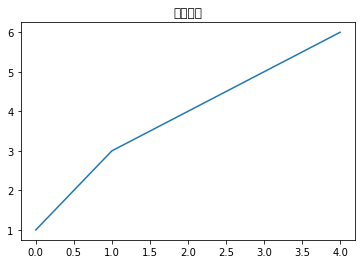

In [29]:
# 한글폰트 확인하기
pd.Series([1,3,4,5,6]).plot(title="한글폰트")

In [30]:
# 한글 폰트를 실행해주기 위해서는 꼭 plt가 있어야하고 아래와 같이 적어주어야 한다. 
import matplotlib.pyplot as plt
font_family = get_font_family()
plt.rc("font", family=font_family)

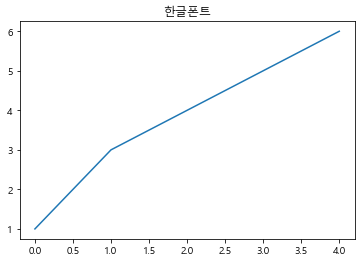

In [31]:
pd.Series([1,3,4,5,6]).plot(title="한글폰트");

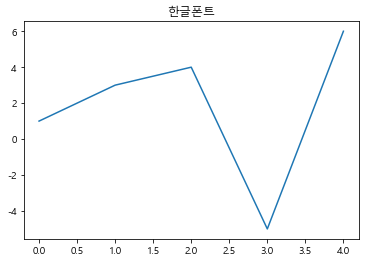

In [32]:
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False) # 해당 코드를 작성하지 않으면 마이너스가 깨짐 
pd.Series([1,3,4,-5,6]).plot(title="한글폰트");

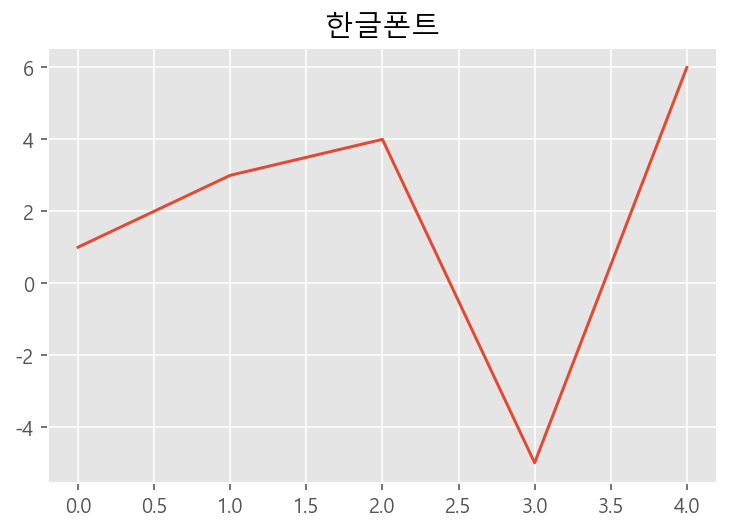

In [33]:
# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
pd.Series([1,3,4,-5,6]).plot(title="한글폰트");

In [34]:
# Market column에 어떤 데이터들이 있는지 확인합니다.
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [35]:
# Market 데이터 빈도수 확인 
df["Market"].value_counts()

KOSPI     5464
KOSDAQ    1504
KONEX      142
Name: Market, dtype: int64

<AxesSubplot:>

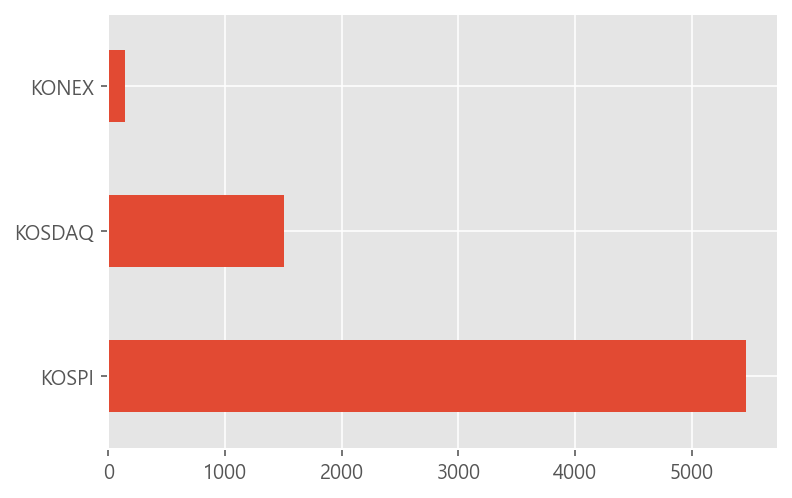

In [36]:
# pandas에 내장된 그래프 속성으로 그리기
df["Market"].value_counts().plot.barh()

In [37]:
# sns의 속성으로 그리기

<AxesSubplot:xlabel='Market', ylabel='count'>

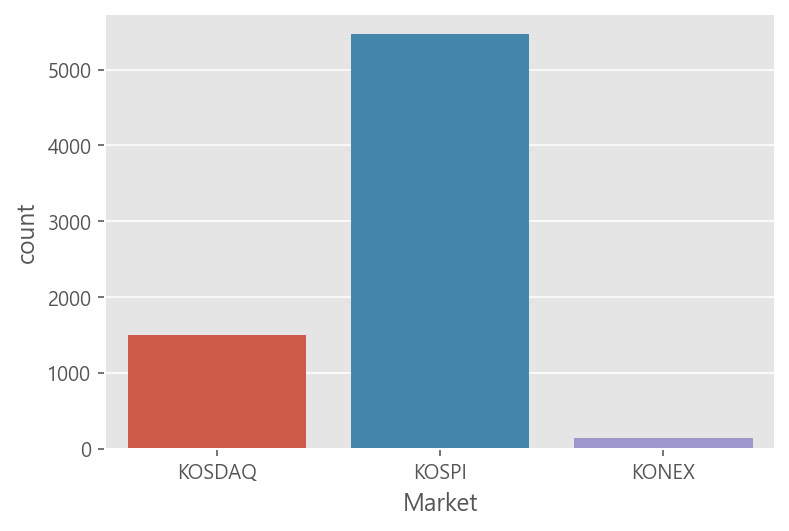

In [38]:
sns.countplot(data=df, x="Market")

<AxesSubplot:>

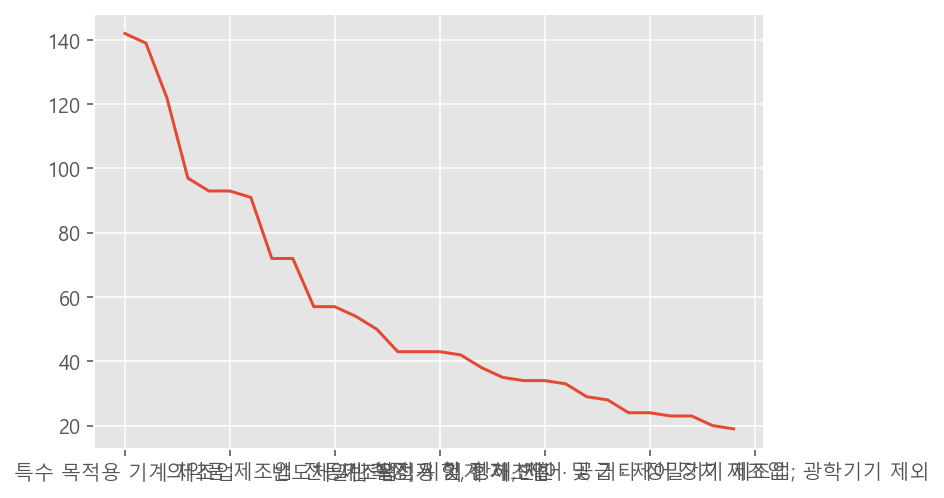

In [39]:
df1 = df["Sector"].value_counts().head(30)
df1.plot()
#   (진짜.. 몰라서 엄청 고생함... 이렇게 간단한데.. 역시 도전하고 차분하게 정리하는 시간이 필요함)

<AxesSubplot:title={'center':'Sector 빈도수'}>

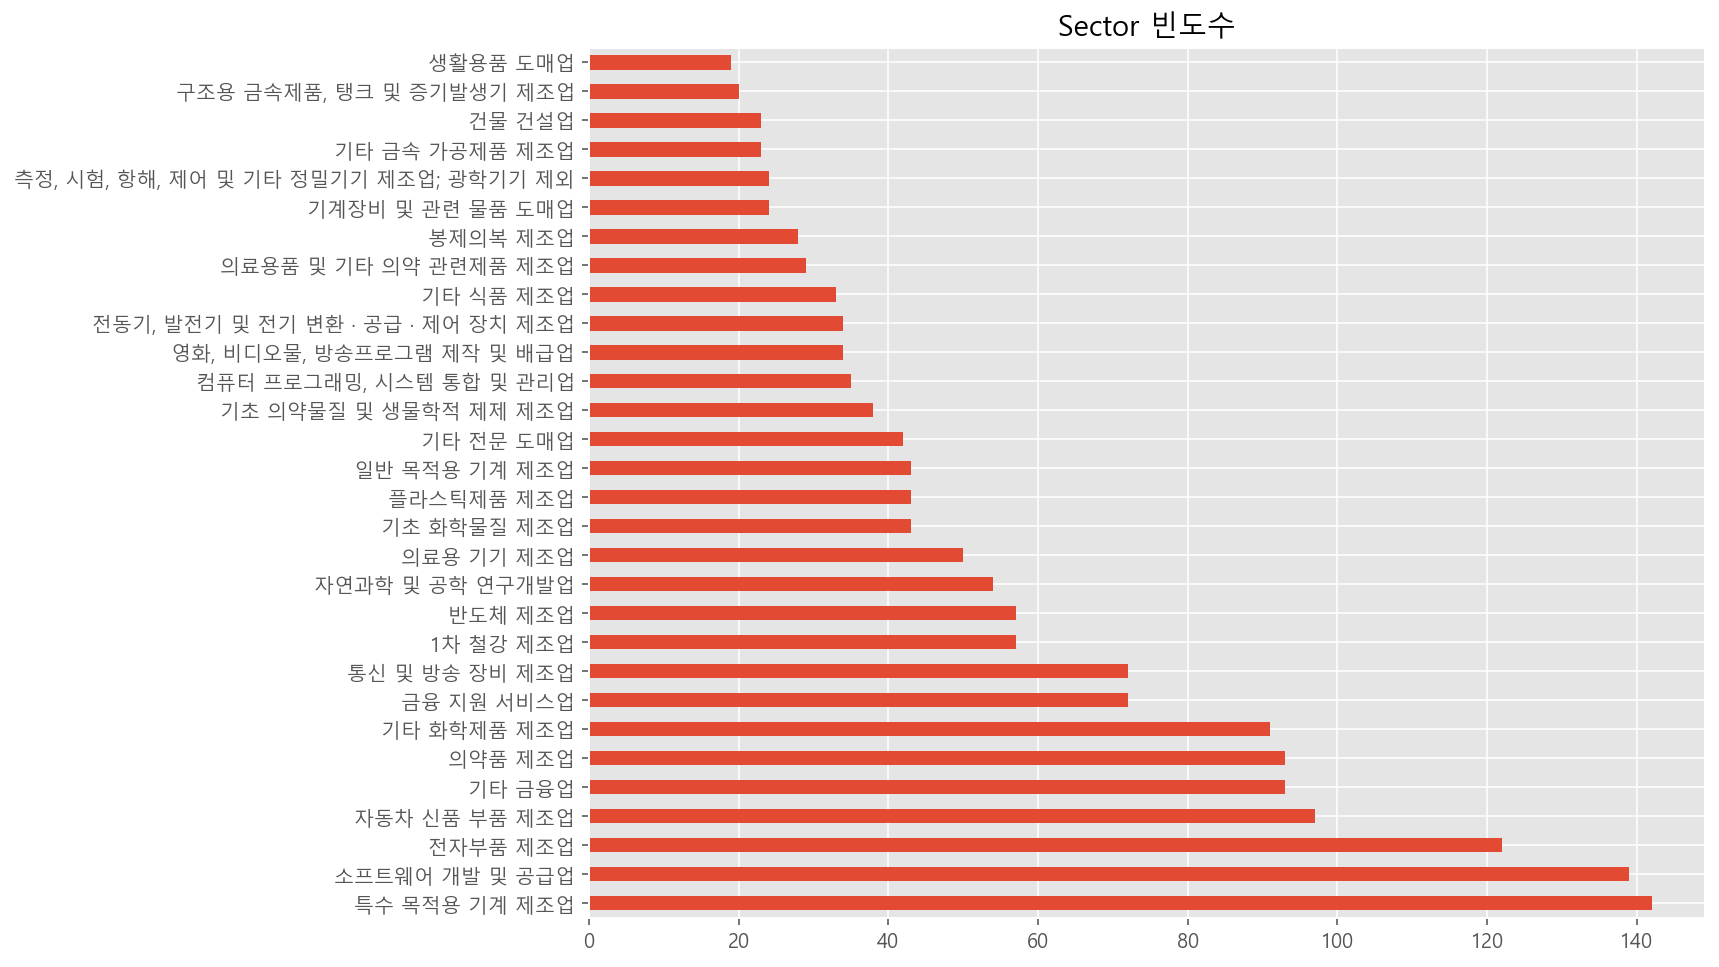

In [40]:
# 위의 글씨가 겹치는 문제를 그래프 종류를 변경하여 해결가능
df1.plot.barh(figsize=(10,8), title="Sector 빈도수")

<AxesSubplot:xlabel='count', ylabel='Sector'>

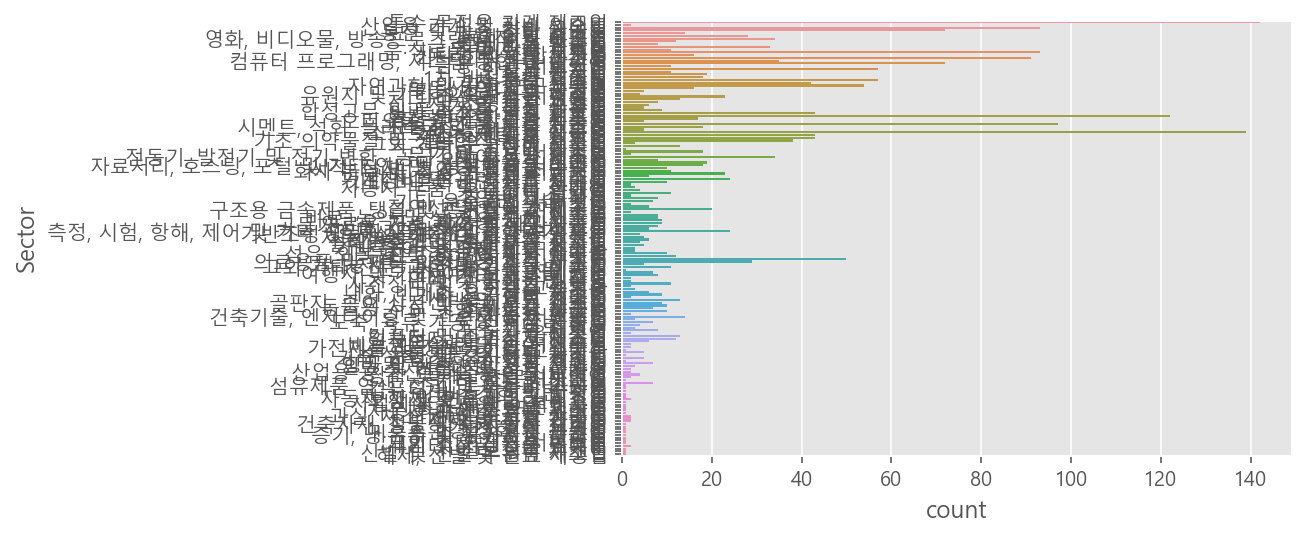

In [41]:
sns.countplot(data=df, y="Sector")

위와 같이 sns에서도 countplot을 그릴 수 있는데 보기가 너무 사납다. 
이럴 때는 위에 df1의 인덱스 값을 가져와서 isin func으로 boolean을 얻고
해당 boolean을 기준으로 df를 인덱스 한 다음 그래프를 그려주면 된다. 

<AxesSubplot:ylabel='count'>

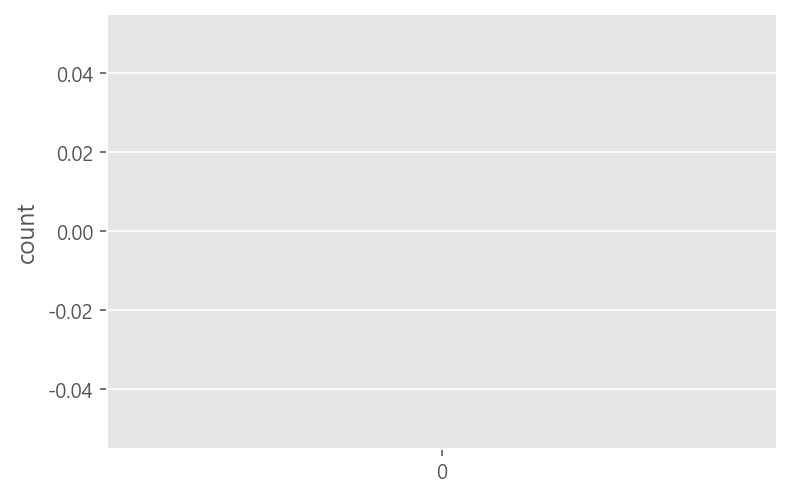

In [42]:
sns.countplot()

In [43]:
df[df["Sector"].isin(df1.index)]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
7098,145020,KOSDAQ,휴젤,기초 의약물질 및 생물학적 제제 제조업,"보툴리눔톡신, 필러",2015-12-24,12월,손지훈,http://www.hugel.co.kr,강원도,2015.0
7099,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시,2002.0
7100,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시,1994.0
7101,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도,2009.0


<AxesSubplot:xlabel='count', ylabel='Sector'>

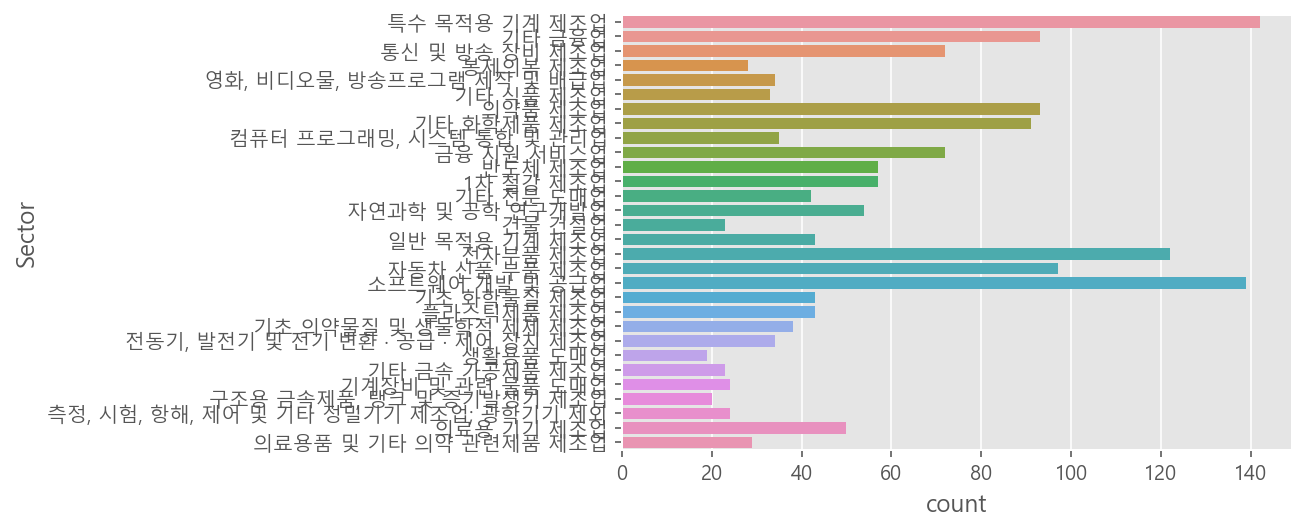

In [44]:
# 자 다시 그래프를 그리면 이렇게 예쁘게 나옴 
sns.countplot(data=df[df["Sector"].isin(df1.index)], y="Sector")

<AxesSubplot:xlabel='count', ylabel='Sector'>

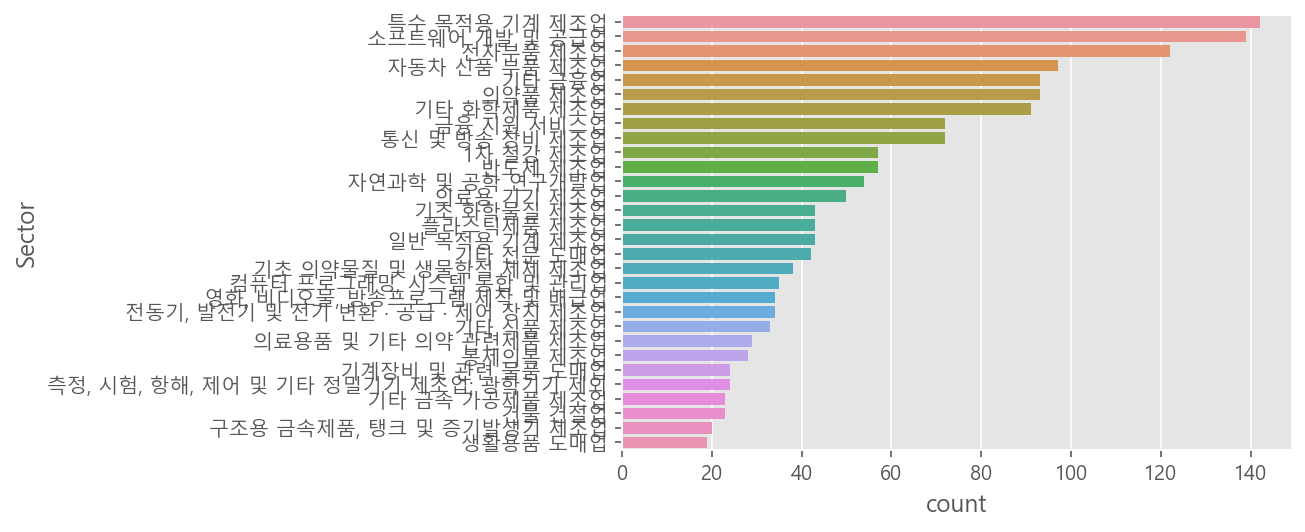

In [45]:
# 그런데 정렬을 해보고 싶다면 말이지 
# ascending이라는 걸로 정렬된 줄 알았더니 order라는 명령어를 사용하더라구!
sns.countplot(data=df[df["Sector"].isin(df1.index)], 
              y="Sector", 
             order=df1.index)

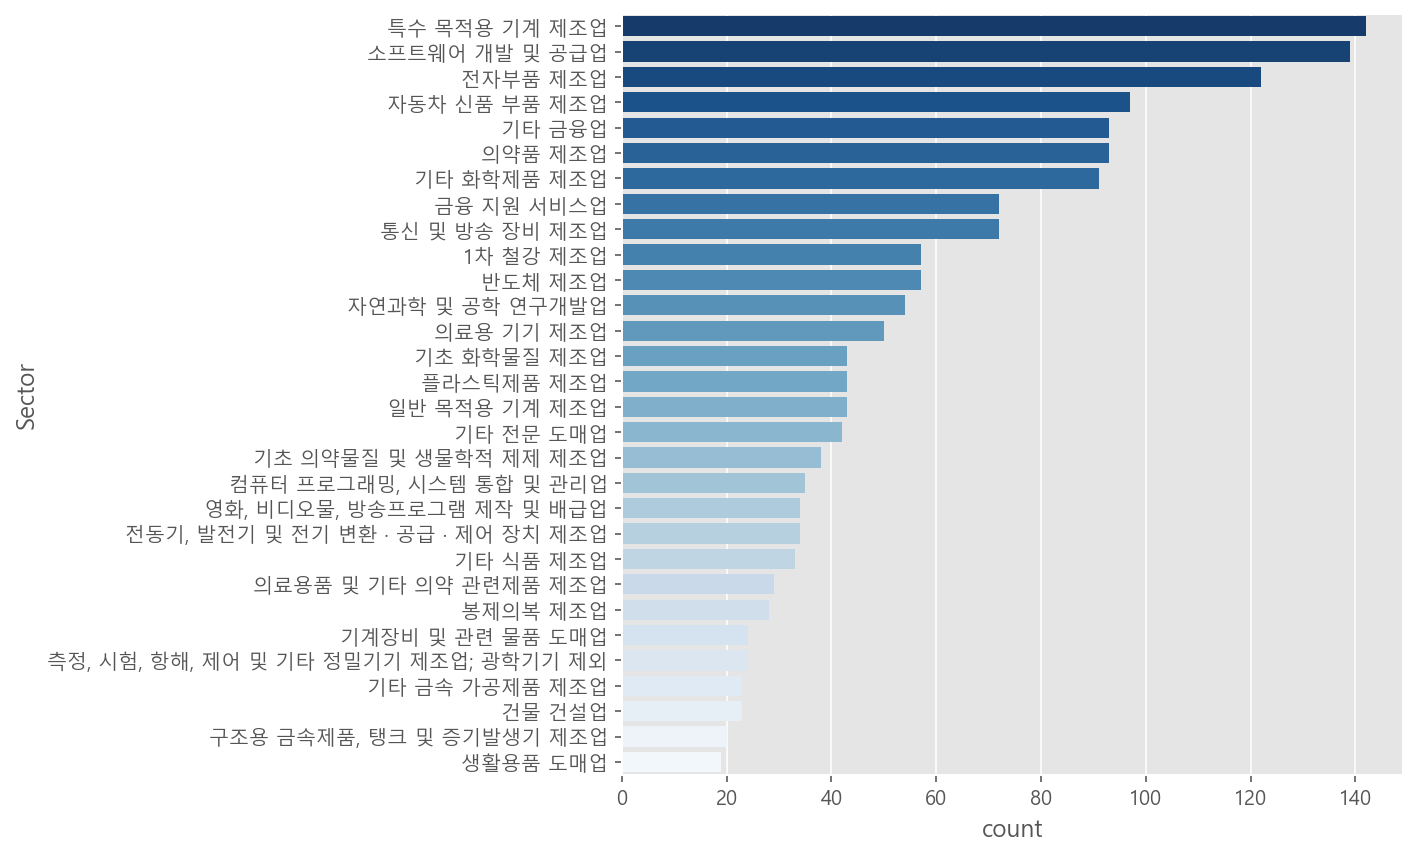

In [46]:
plt.figure(figsize=(7,7))
sns.countplot(data=df[df["Sector"].isin(df1.index)], 
              y="Sector", palette="Blues_r", 
             order=df1.index);

In [47]:
# 빈도수가 가장 많은 데이터 색인하기
df[df["Sector"] == "특수 목적용 기계 제조업"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
80,068790,KOSDAQ,DMS,특수 목적용 기계 제조업,LCD 제조장비,2004-10-01,12월,박용석,http://www.dms21.co.kr,경기도,2004.0
100,083450,KOSDAQ,GST,특수 목적용 기계 제조업,"GasScrubber,Chiller",2006-02-01,12월,김덕준,http://www.gst-in.com,경기도,2006.0
124,078150,KOSDAQ,HB테크놀러지,특수 목적용 기계 제조업,TFT-LCD검사장비,2004-12-08,12월,문성준,http://www.ncbnet.co.kr,충청남도,2004.0
...,...,...,...,...,...,...,...,...,...,...,...
7069,010660,KOSPI,화천기계,특수 목적용 기계 제조업,"선반,밀링,연삭기,CNC선반,CNC밀링,머시닝센타 제조,판매/자동차부품(실린더블럭) 제조",1988-12-12,12월,"권영열, 권형석",http://www.hwacheon.co.kr,서울특별시,1988.0
7070,000850,KOSPI,화천기공,특수 목적용 기계 제조업,"CNC선반,CNC밀링,연마기(금속공작기계),MC공작기계,COPY밀링기계,주방품 제조,도매",1999-11-18,12월,"각자대표이사 권영두, 권영렬",http://www.hwacheon.com,광주광역시,1999.0
7086,090710,KOSDAQ,휴림로봇,특수 목적용 기계 제조업,제조업용로봇및서비스로봇,2006-12-05,12월,정광원,http://www.dstrobot.com,충청남도,2006.0
7101,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도,2009.0


Industry column으로 그래프 그리기 연습
   

In [48]:
df2 = df["Industry"].value_counts().head(30)

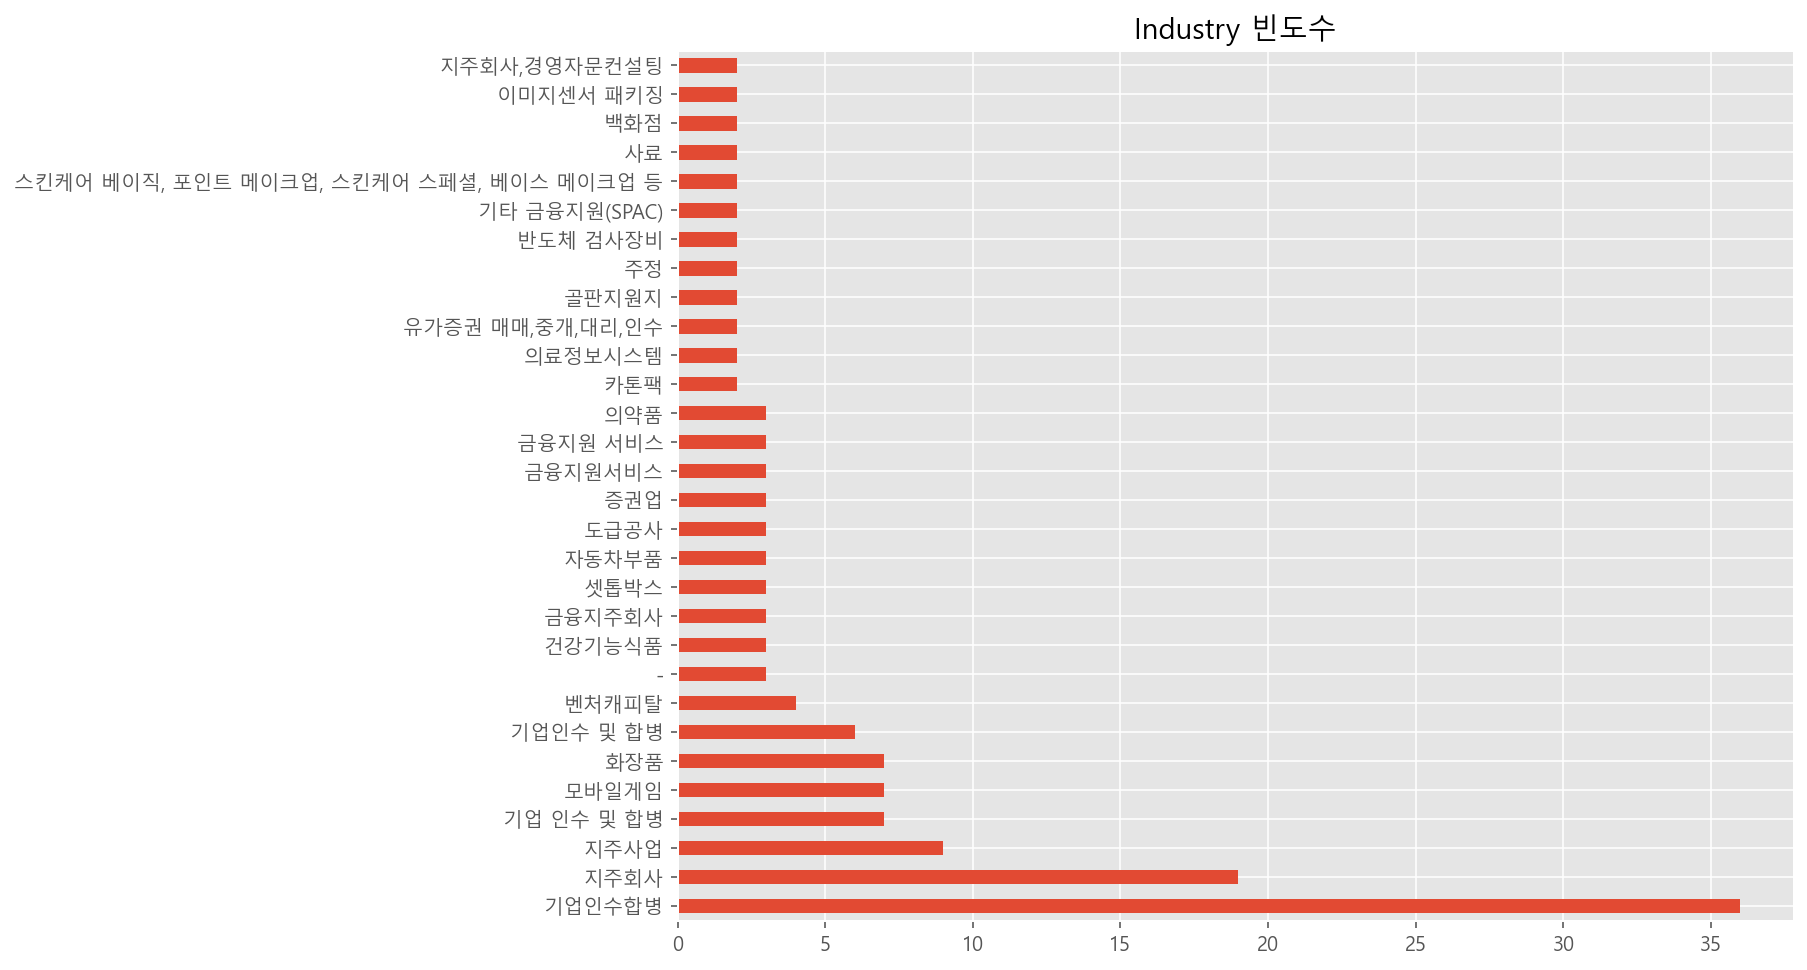

In [49]:
df2.plot.barh(figsize=(10,8), title="Industry 빈도수");

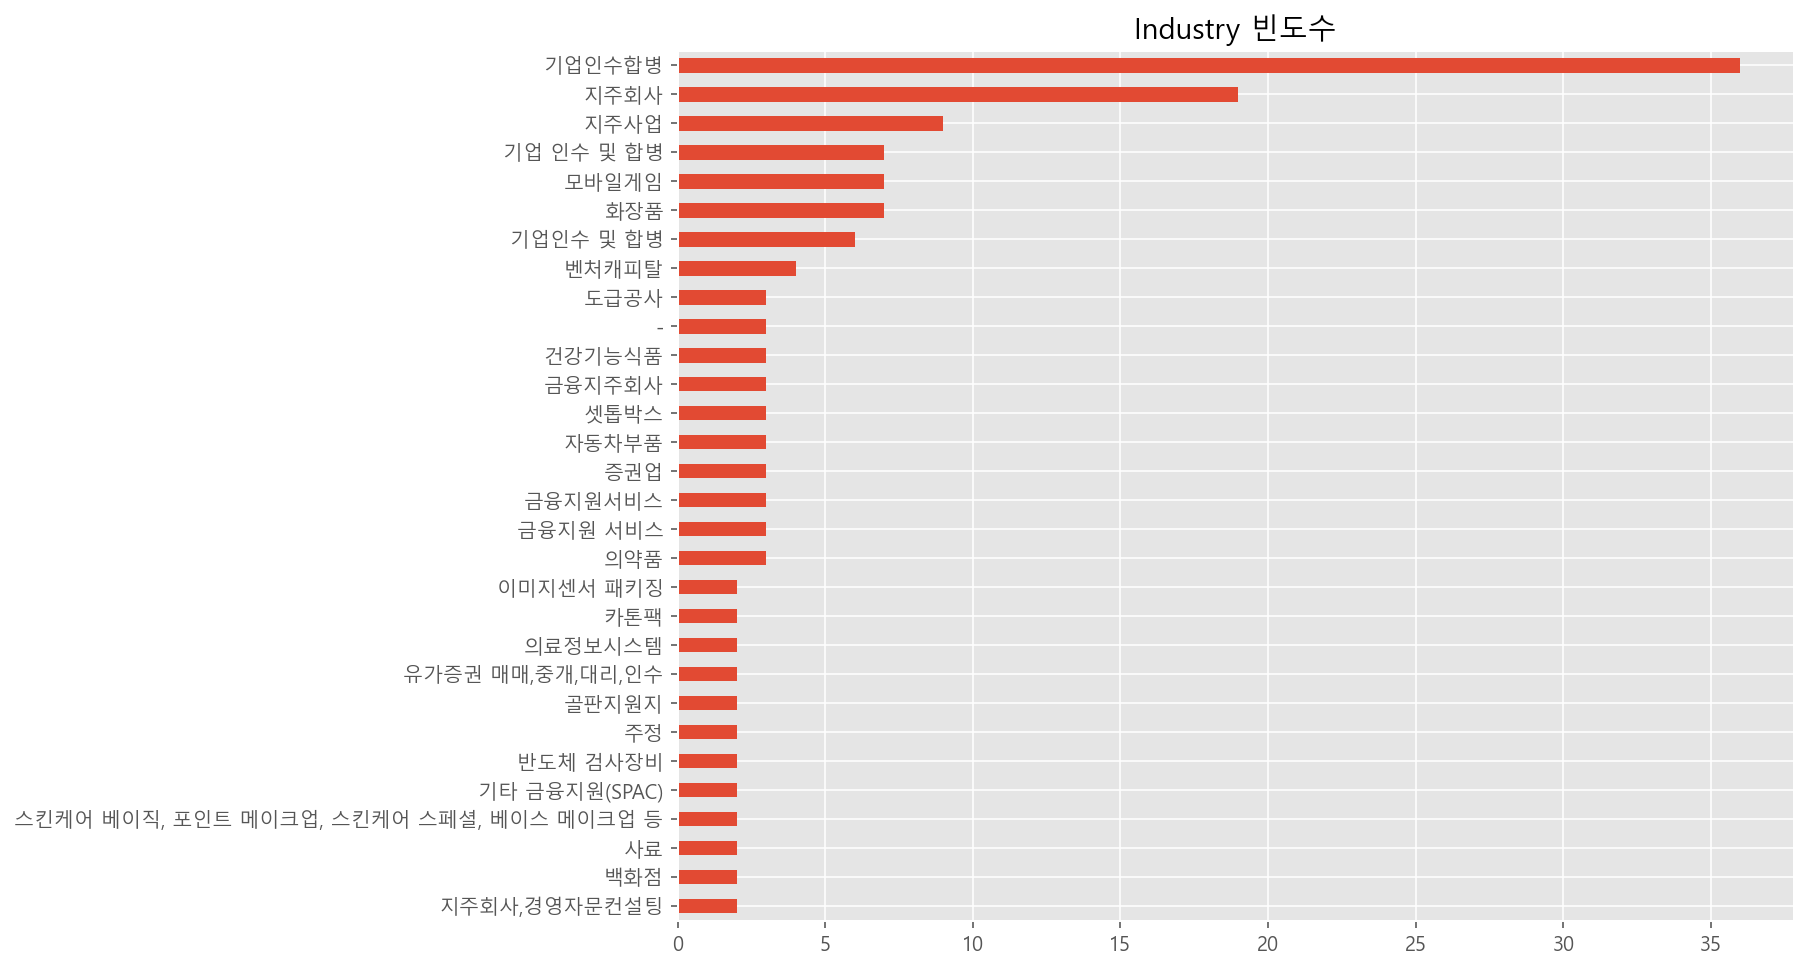

In [50]:
# 위에와 같은 그래프인데 sort_value()만 있으면 바로 역순으로 나열가능! 
df2 = df["Industry"].value_counts().head(30).sort_values()
df2.plot.barh(figsize=(10,8), title="Industry 빈도수");

<AxesSubplot:xlabel='count', ylabel='Industry'>

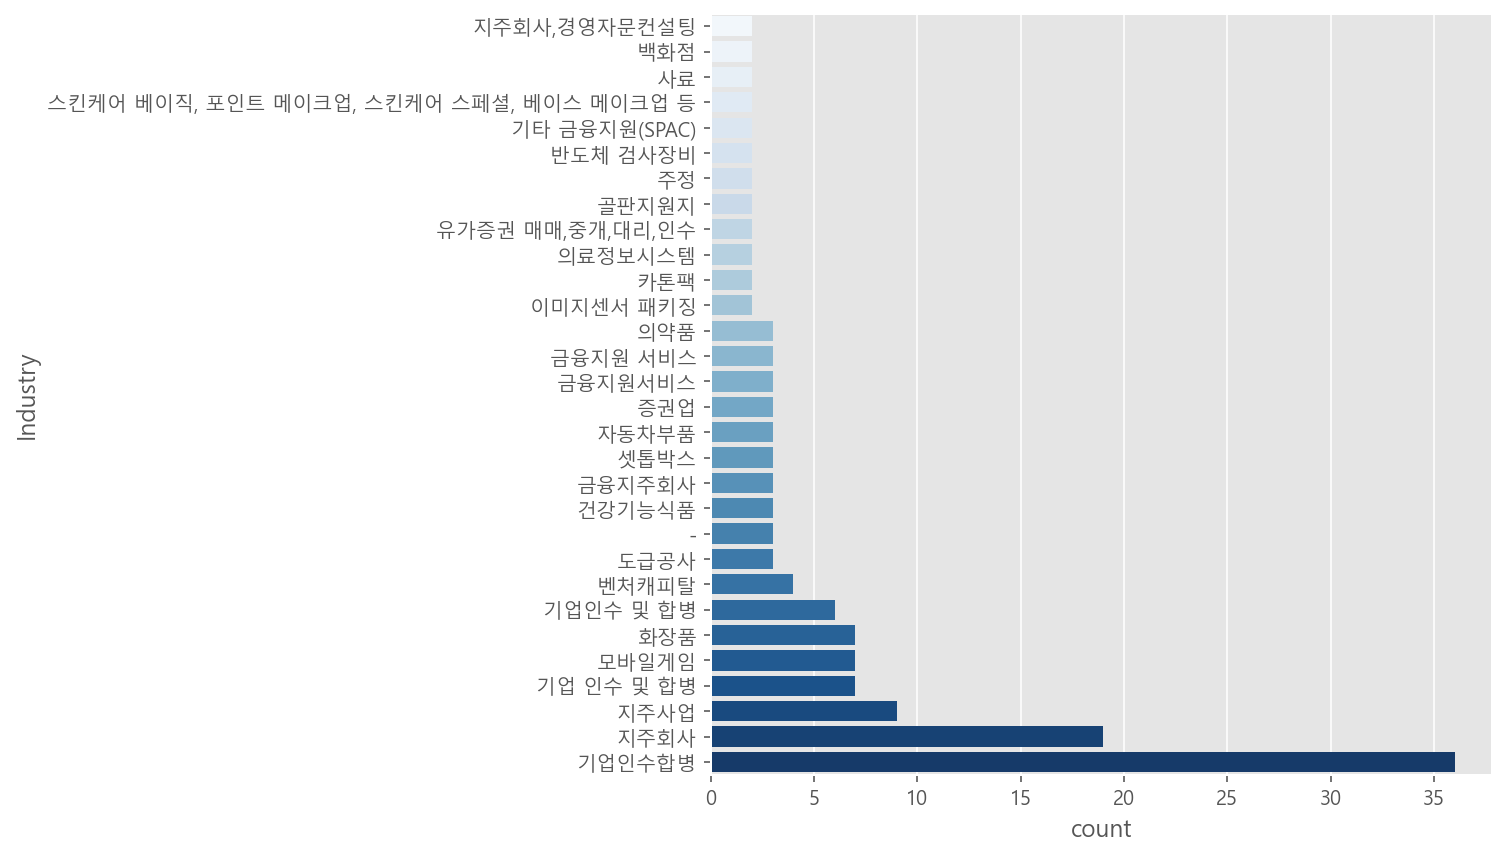

In [51]:
plt.figure(figsize=(7,7))
sns.countplot(data=df[df["Industry"].isin(df2.index)], 
              y="Industry", palette="Blues", 
              order=df2.index)

region으로 그래프 그리기 연습

<AxesSubplot:>

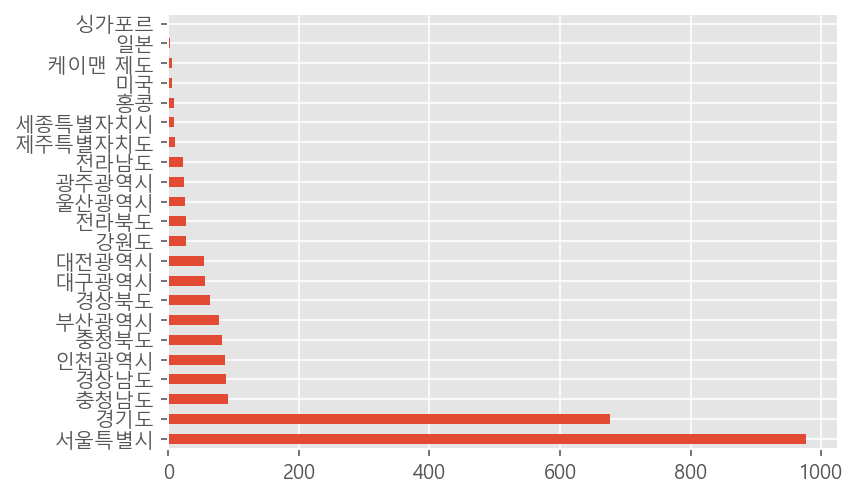

In [52]:
df["Region"].value_counts().plot.barh()

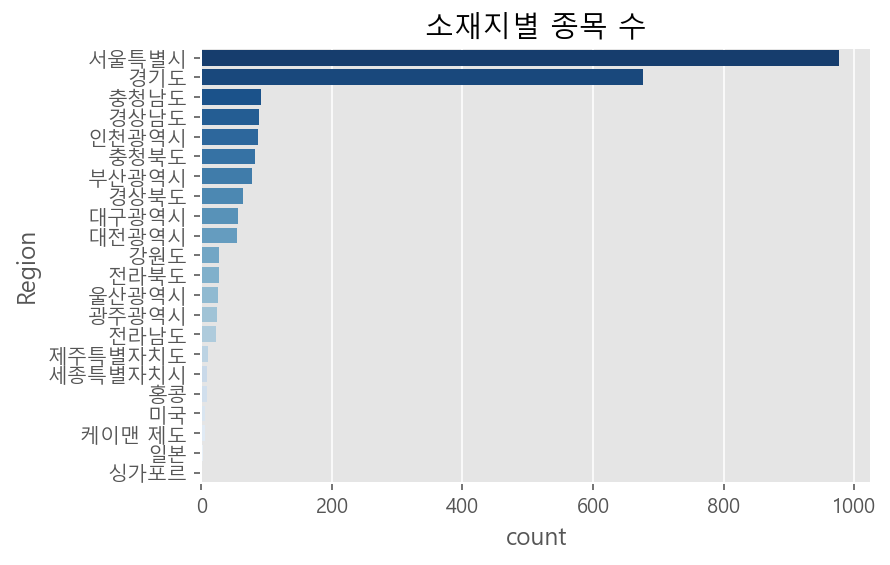

In [53]:
# 사실 별도의 전처리 없이 sns으로 아래와 같이 작성하면
# 바로 시각화를 할 수 있음....ㅎㅎㅎㅎ Simple!!!!
# order를 아래와 같이 작성하면 바로 탑에 있는 녀석들을 볼 수 있는 것이죠!
# 와! 이거 진짜 심박하네요! 
sns.countplot(data=df, y="Region", 
              palette="Blues_r",
              order=df["Region"].value_counts().head(30).index).set_title("소재지별 종목 수");

<AxesSubplot:xlabel='count', ylabel='Region'>

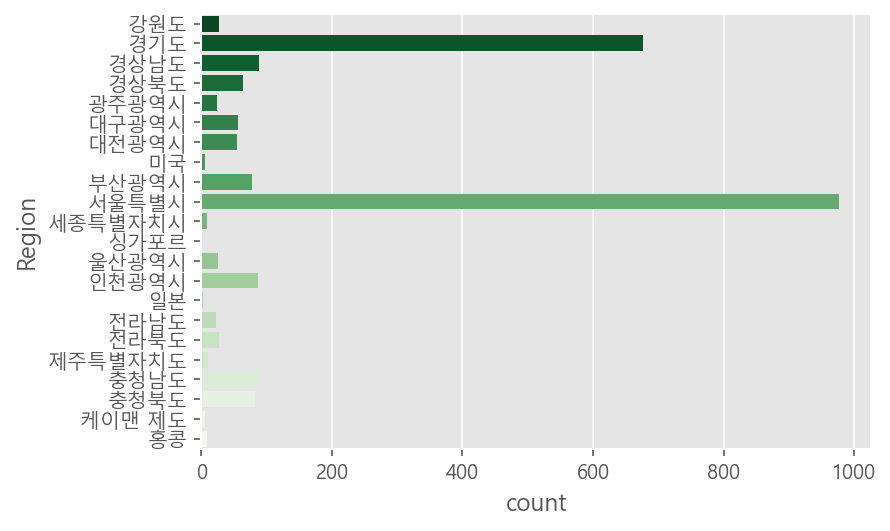

In [54]:
# 또 다른 정렬방법 ( 기존 df의 순서대로 정렬하기 )
sns.countplot(data=df.sort_values(by="Region"),
              palette="Greens_r",
              y="Region")

두개의 변수에 대한 시각화
* pd.crosstab을 통한 2개의 변수에 대한 빈도수 구하기

In [55]:
# 첫번째로 넣어주는 컬럼이 인덱스가 되고, 뒤에 넣어주는 것이 컬럼으로 간다. 
pd.crosstab(df["Market"], df["Region"])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,7,37,0,7,6,1,7,0,1,54,...,0,4,0,3,1,1,3,9,0,0
KOSDAQ,16,493,49,38,9,34,39,5,39,515,...,10,57,3,13,15,2,63,59,4,9
KOSPI,4,146,40,19,9,21,8,0,37,408,...,16,25,0,7,11,7,26,14,1,0


<AxesSubplot:xlabel='count', ylabel='Region'>

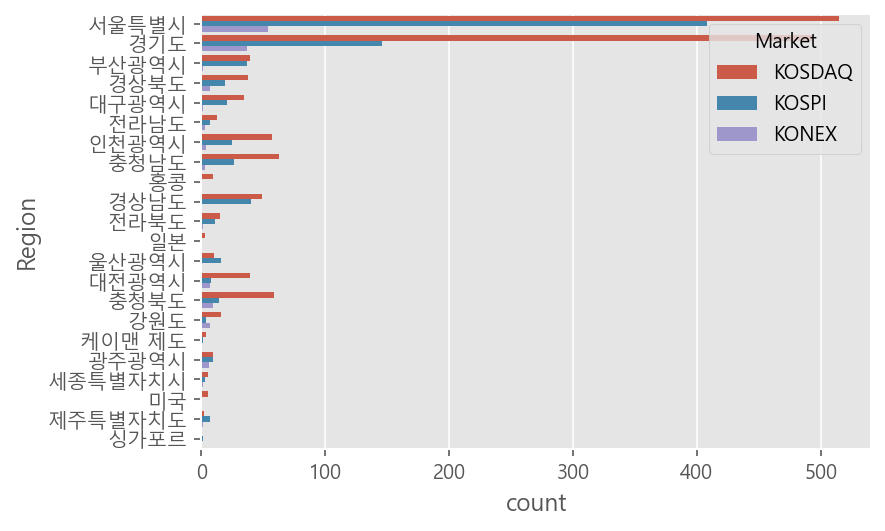

In [56]:
# 1번
# countplot으로 Market과 Region으로 빈도수 시각화 하기 
sns.countplot(data=df, y="Region", hue="Market")

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

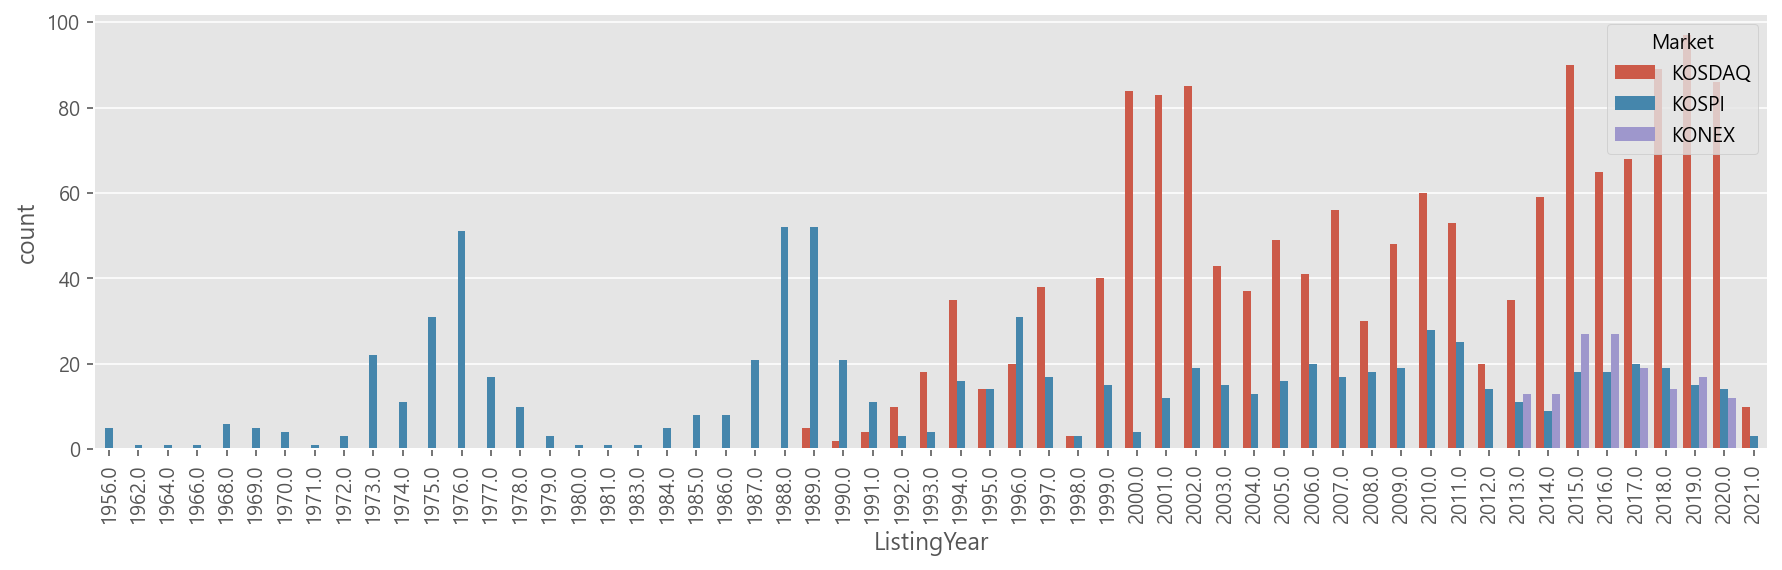

In [57]:
# 2번
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# hue 를 사용해 다른 변수를 함께 표현합니다. hue는 색상을 의미합니다.
plt.figure(figsize=(15, 4))
plt.xticks(rotation=90)
sns.countplot(data=df, x="ListingYear", hue="Market")

In [58]:
# 3번 
# Market, ListingYear 빈도수 구하기
df_market_year = pd.crosstab(df["Market"], df["ListingYear"])
df_market_year

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,13,13,27,27,19,14,17,12,0
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,20,35,59,90,65,68,89,97,86,10
KOSPI,5,1,1,1,6,5,4,1,3,22,...,14,11,9,18,18,20,19,15,14,3


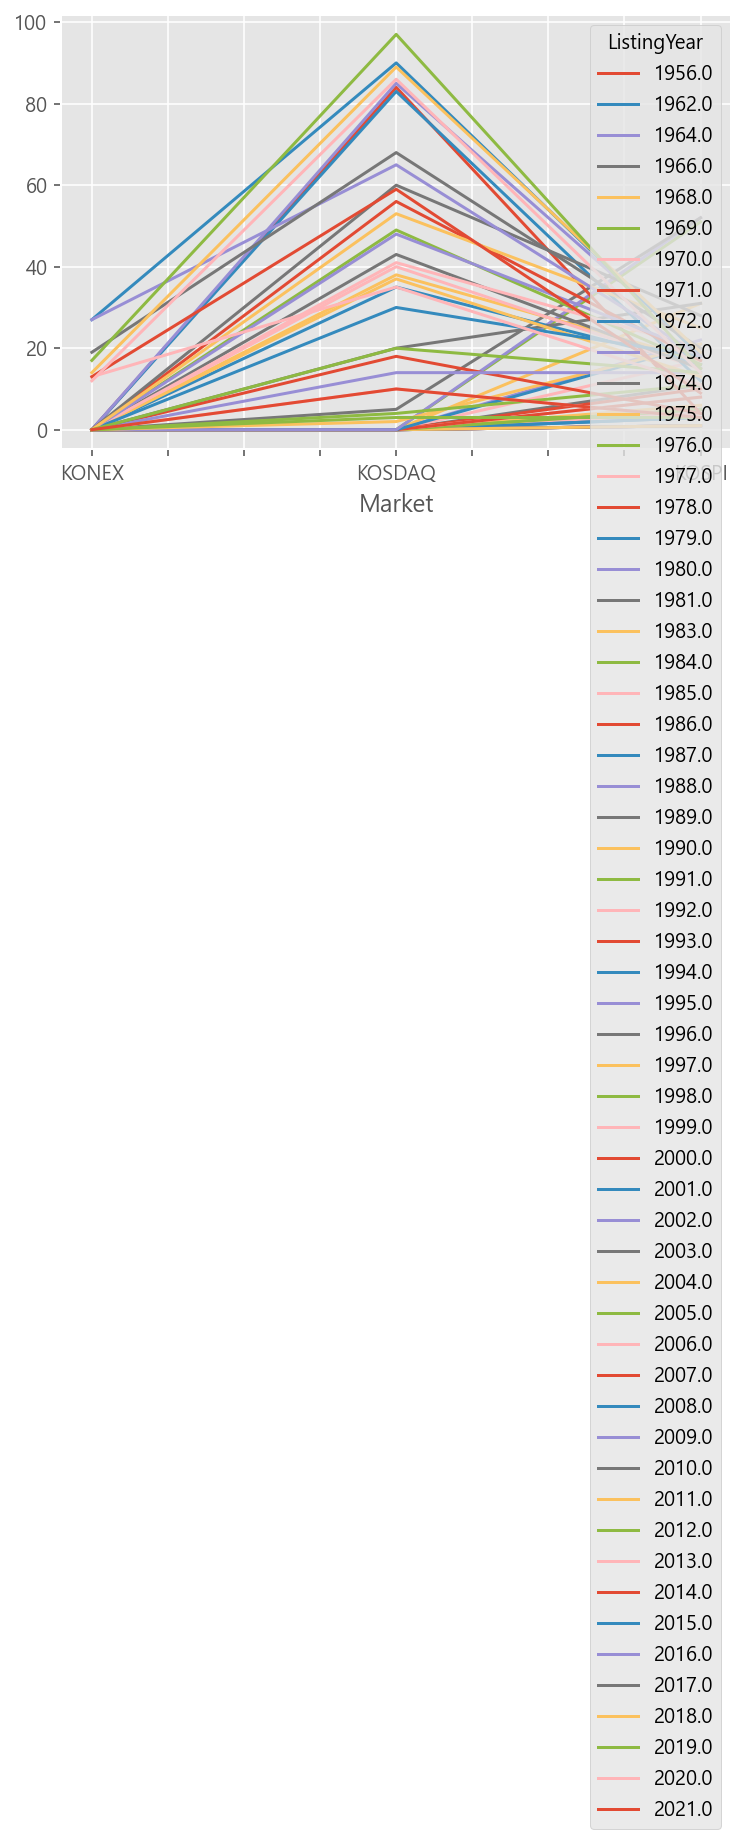

In [59]:
df_market_year.plot();

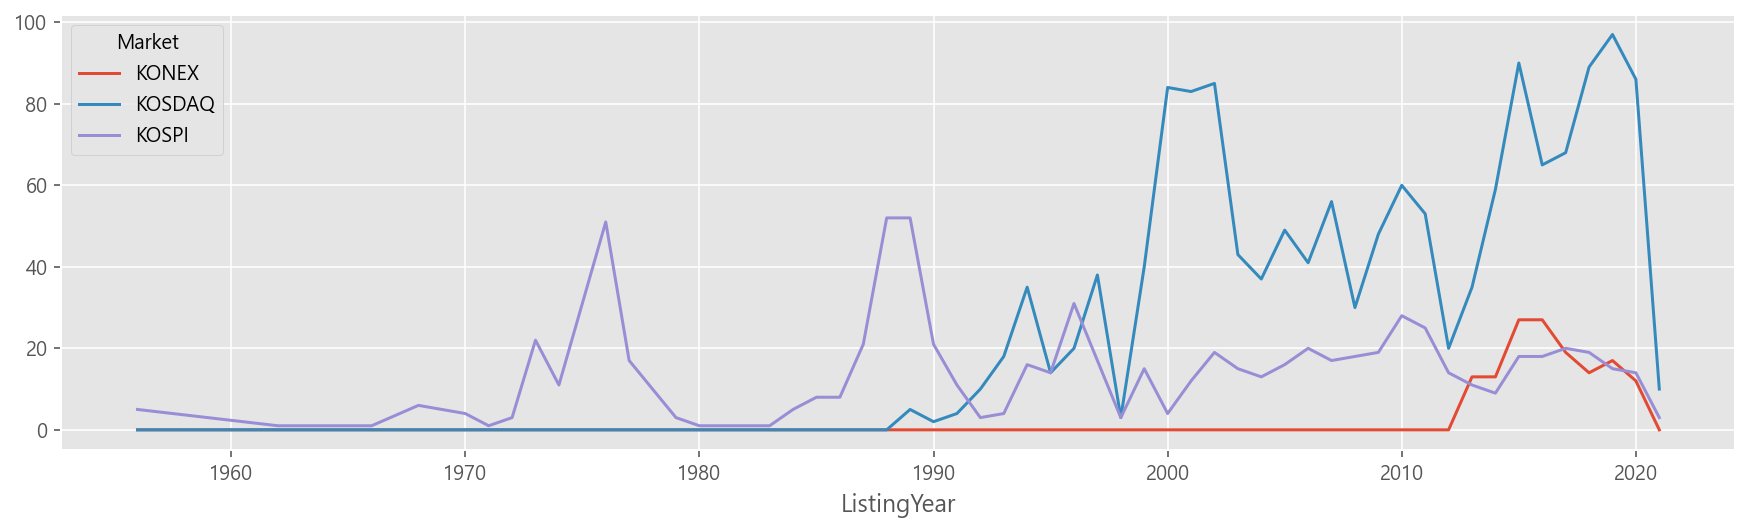

In [60]:
# 으악! 위 그래프가 정말... 보기가 힘들구만...
# 단 한글자로 그래프에 마법을 부려보겠습니다. 
df_market_year.T.plot(figsize=(15, 4));

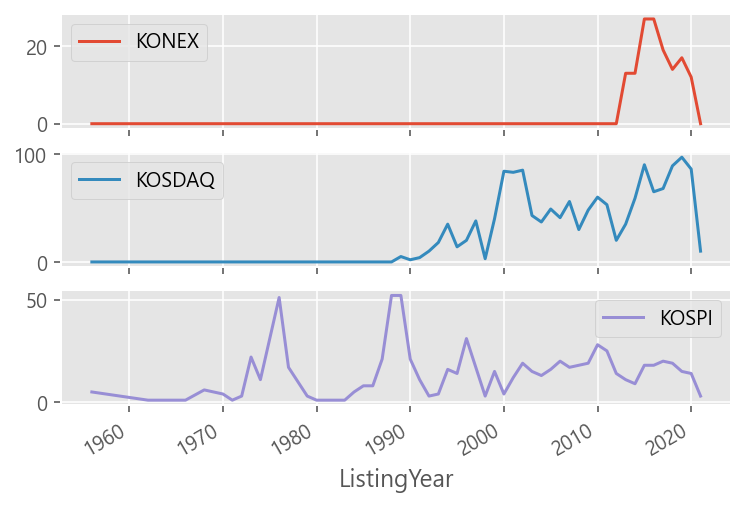

In [61]:
# sub plot으로 그려보자 
# 그런데 y축 값이 다 다르다는 걸 알 수 있다. 
# 앞으로 활용할 때는 y축 값이 일정한 데이터에 한하여 사용하도록 해봐야겠다. 
df_market_year.T.plot(subplots=True);

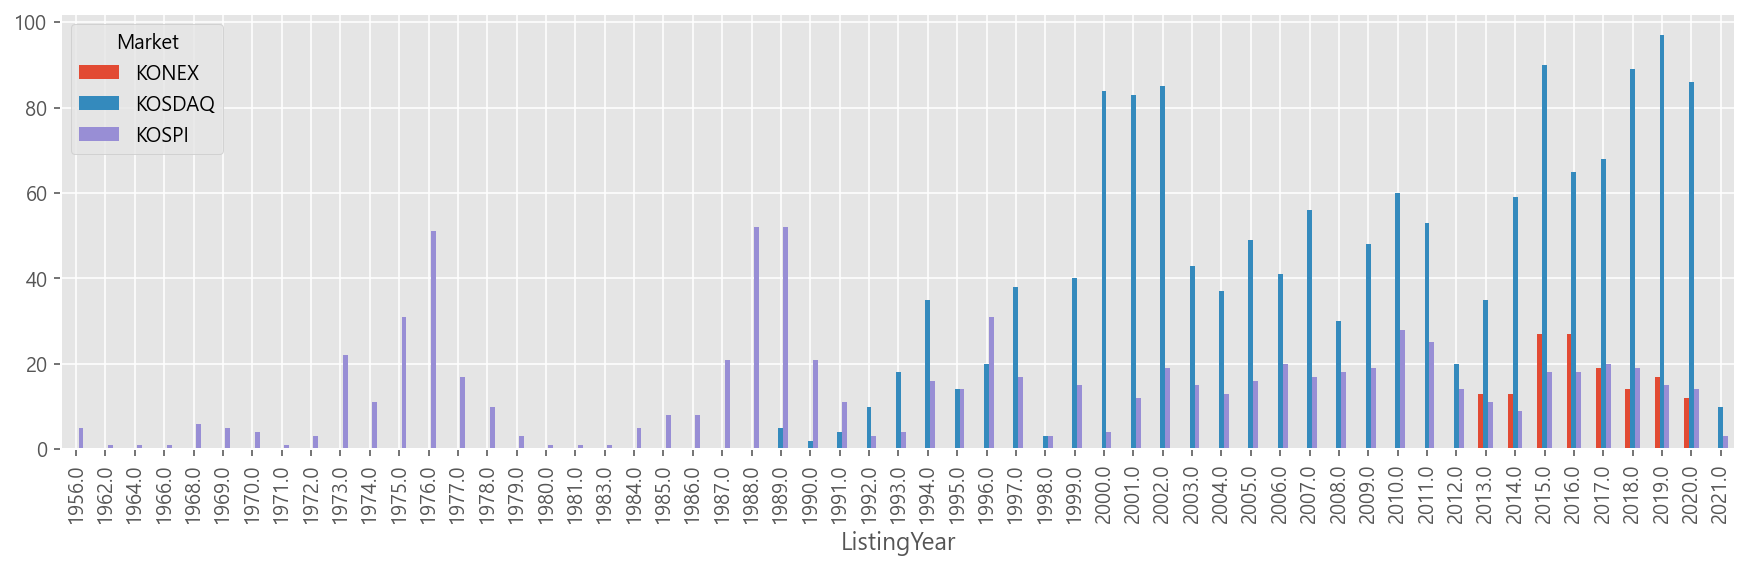

In [62]:
df_market_year.T.plot.bar(figsize=(15, 4));

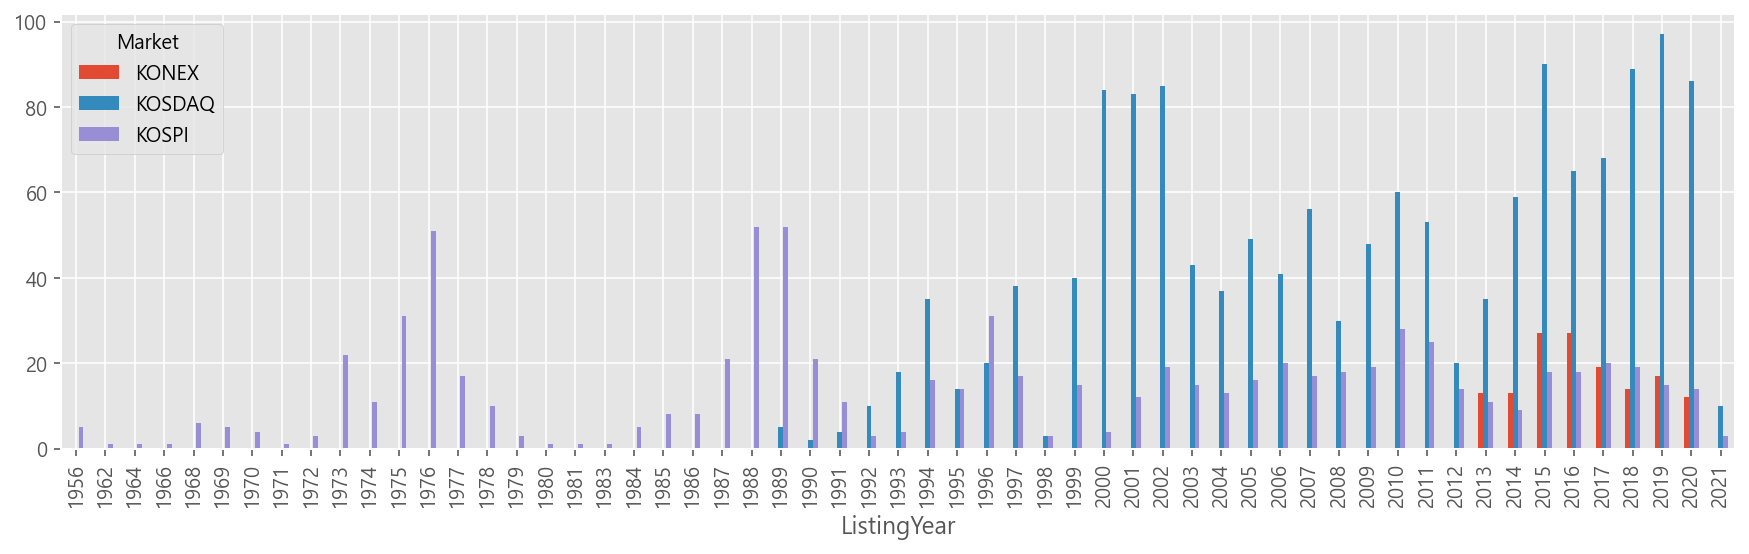

In [63]:
# 컬럼명의 데이터 타입을 int 형태로 변경합니다.
df_market_year.columns = df_market_year.columns.astype(int)
df_market_year.T
df_market_year.T.plot.bar(figsize=(15, 4));

groupby 사용법

In [64]:
# 묶는 기준을 groupby내에 넣어주자 : groupby(["ListingYear", "Market" ])
# 묶어주고 싶은 컬럼을 그 뒤에 적어주자 : ["Symbol"]
# 어떤 방식으로 진행할지를 . 과 함께 적어주자 

df.groupby(["ListingYear", "Market" ])["Symbol"].count()

ListingYear  Market
1956.0       KOSPI      5
1962.0       KOSPI      1
1964.0       KOSPI      1
1966.0       KOSPI      1
1968.0       KOSPI      6
                       ..
2020.0       KONEX     12
             KOSDAQ    86
             KOSPI     14
2021.0       KOSDAQ    10
             KOSPI      3
Name: Symbol, Length: 98, dtype: int64

In [65]:
# 코드를 나누어서 하나씩 실행해보세요 
# reset_index를 추가하면 시리즈를 데이터프래임으로 바꿔줄 수 있음 
df.groupby(["ListingYear", "Market" ])["Symbol"].count().reset_index()

# 새롭게 추가된 컬럼의 이름을 바꿔주고 싶다면 index(name="count")를 넣어주면 된다. 
df.groupby(
    ["ListingYear", "Market" ])["Symbol"].count().reset_index(name="count")

# 재사용하기 위해서 변수가 저장을 해주자 
df_year_market = df.groupby(
        ["ListingYear", "Market" ])["Symbol"].count().reset_index(name="count")

In [66]:
df_year_market

,ListingYear,Market,count
0,1956.0,KOSPI,5
1,1962.0,KOSPI,1
2,1964.0,KOSPI,1
3,1966.0,KOSPI,1
4,1968.0,KOSPI,6
...,...,...,...
93,2020.0,KONEX,12
94,2020.0,KOSDAQ,86
95,2020.0,KOSPI,14
96,2021.0,KOSDAQ,10


pivot_table 사용법
 * pivot_table은 형태도 바꾸고 연산이 가능함
 * pivot은 형태만 바꿔줌

In [67]:
df_year_market = pd.pivot_table(data=df, index="ListingYear", aggfunc="count")
# 이와 같이 작성을 하면 전부다에 대한 COUNT가 되니까 특정 값을 지정해줘야겠지?

In [68]:
# 코드를 나누어서 하나씩 실행해보세요 
df_year_market = pd.pivot_table(data=df, index=["ListingYear", "Market"], 
               values="Symbol", aggfunc="count")
df_year_market = df_year_market.reset_index()
df_year_market
# 위와 같이만 작성을 하면 이름을 바꿀 수가 없다. 
# groupby처럼 index() 괄호 안에 넣어주었더니 오류가.. 난다.. 
# 그럼 어떻게 하지 ?
df_year_market.rename(columns={"Symbol":"Count"})

# 잉? 왜 안바꾸었을까? 음..음...... 아!
df_year_market = df_year_market.rename(columns={"Symbol":"Count"})
df_year_market

,ListingYear,Market,Count
0,1956.0,KOSPI,5
1,1962.0,KOSPI,1
2,1964.0,KOSPI,1
3,1966.0,KOSPI,1
4,1968.0,KOSPI,6
...,...,...,...
93,2020.0,KONEX,12
94,2020.0,KOSDAQ,86
95,2020.0,KOSPI,14
96,2021.0,KOSDAQ,10


<AxesSubplot:xlabel='ListingYear', ylabel='Count'>

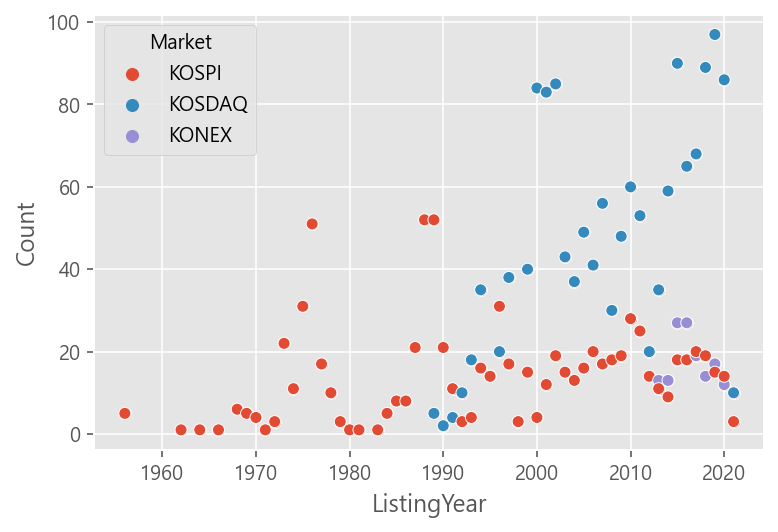

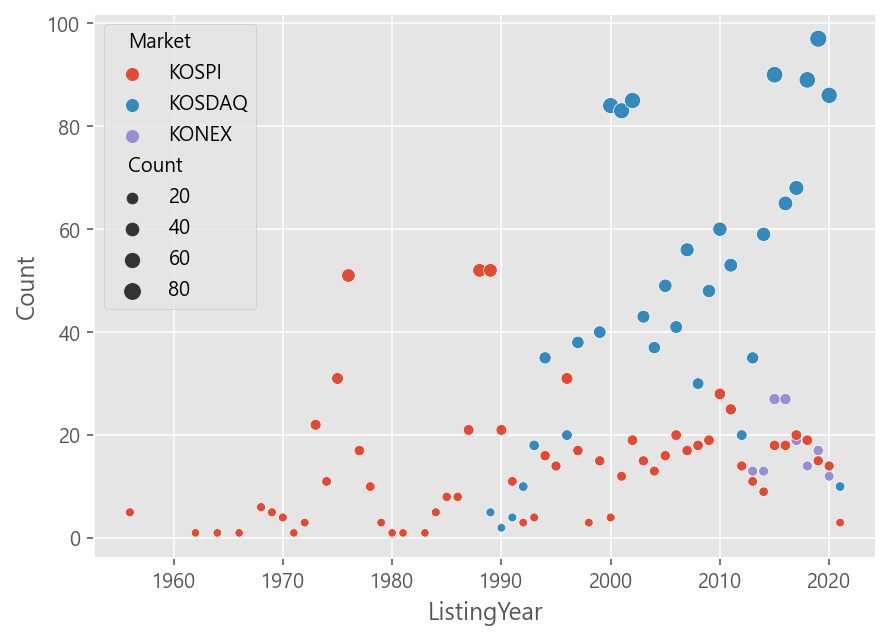

In [69]:
# 데이터에 대한 이해가 없다면 시각화 하기도 어렵구나! 
sns.scatterplot(data=df_year_market, x="ListingYear", y="Count")

# Market이 3개나 있는데 색상이 모두 똑같네?
# hue를 이용하여 색을 분류해보자 
sns.scatterplot(data=df_year_market, x="ListingYear", y="Count", hue="Market")

# hue을 구분하였는데 각 점별로 횟수가 다른데.. 
# 이걸 어떻게 표현해 줄 수 있을까?
# 크기가 작으니까 키워주자 
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_year_market, 
                x="ListingYear", y="Count", 
                hue="Market", size="Count")

<AxesSubplot:xlabel='ListingYear', ylabel='Count'>

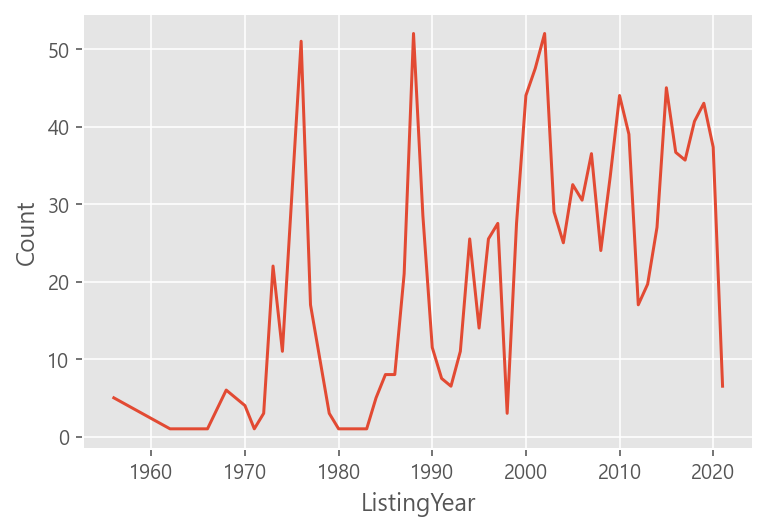

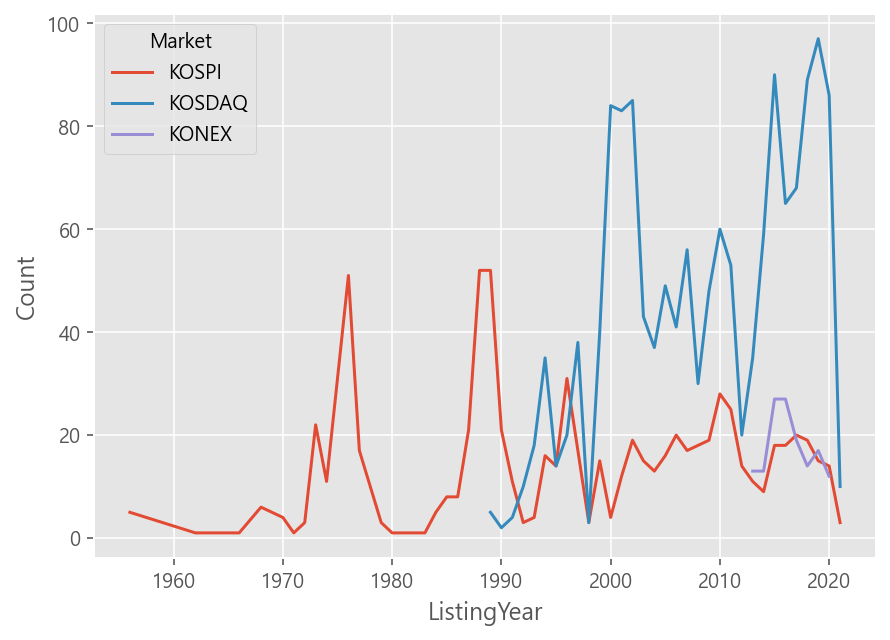

In [70]:
# 이번에는 라인그래프를 그려보자 
# sns.lineplot(data=df_year_market, x="ListingYear", y="Count")

# 지금까지 못보던 녀석이 나오네.. 이건 머지?
# 이건 sns의 기본값 중 ci, n_boot라는 것 때문이야 
# 즉 저 라인에 있는 95% 신뢰구간을 표시해주는 아주 좋으 녀석이지
# 만약 없애주고 싶다면! ci=None을 입력하면 돼 
sns.lineplot(data=df_year_market, x="ListingYear", y="Count", ci=None)

# Market 별로 색상을 다르게 한다. 
plt.figure(figsize=(7,5))
sns.lineplot(data=df_year_market, x="ListingYear", y="Count", hue="Market", ci=None)

relplot 배우기
 * relplot과 scatterplot의 가장 큰 차이점 : subplot을 그릴 수 있냐 없냐의 차이

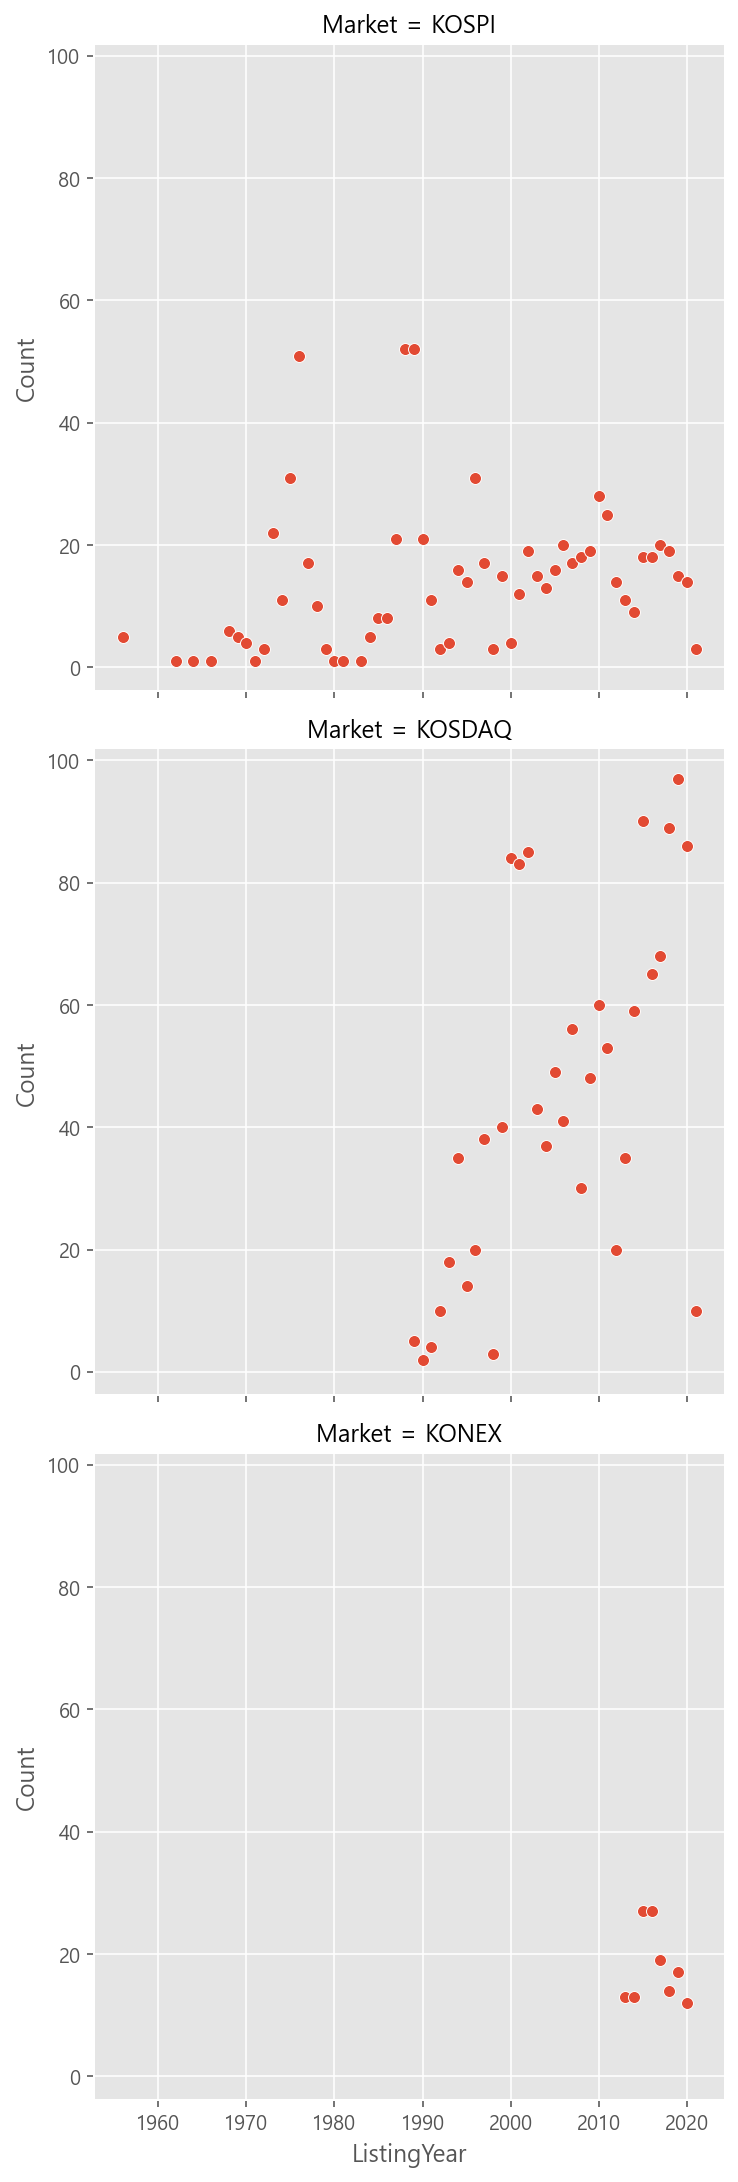

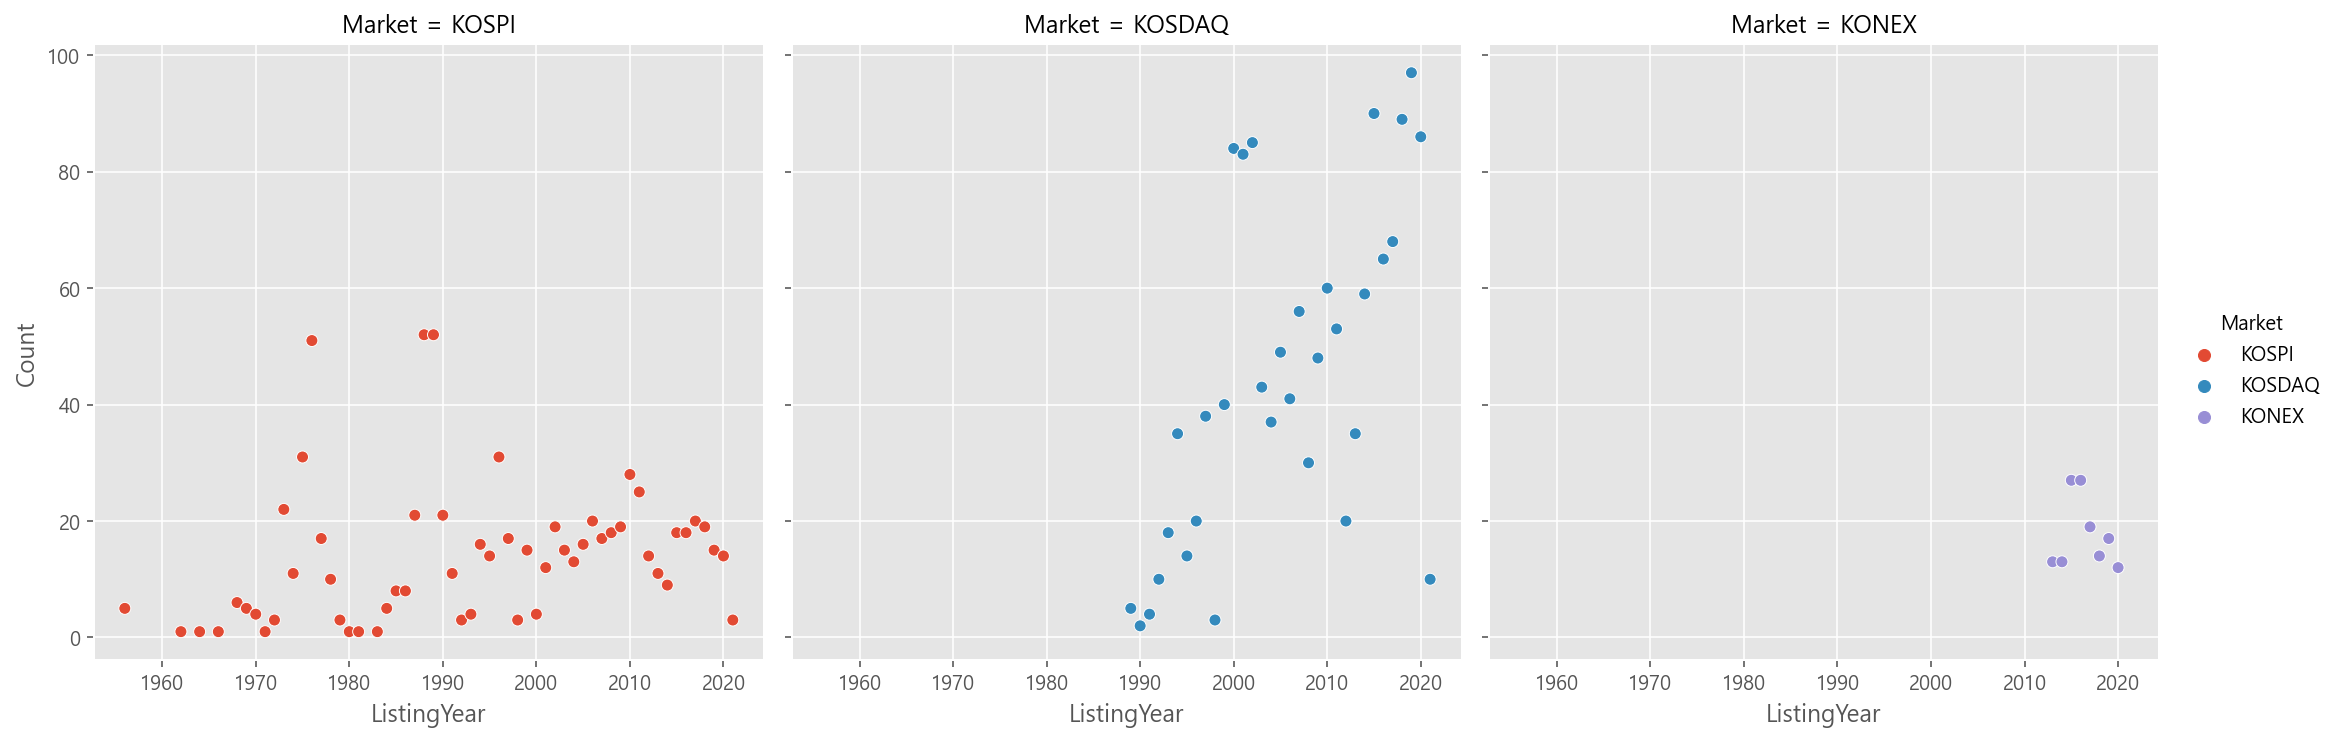

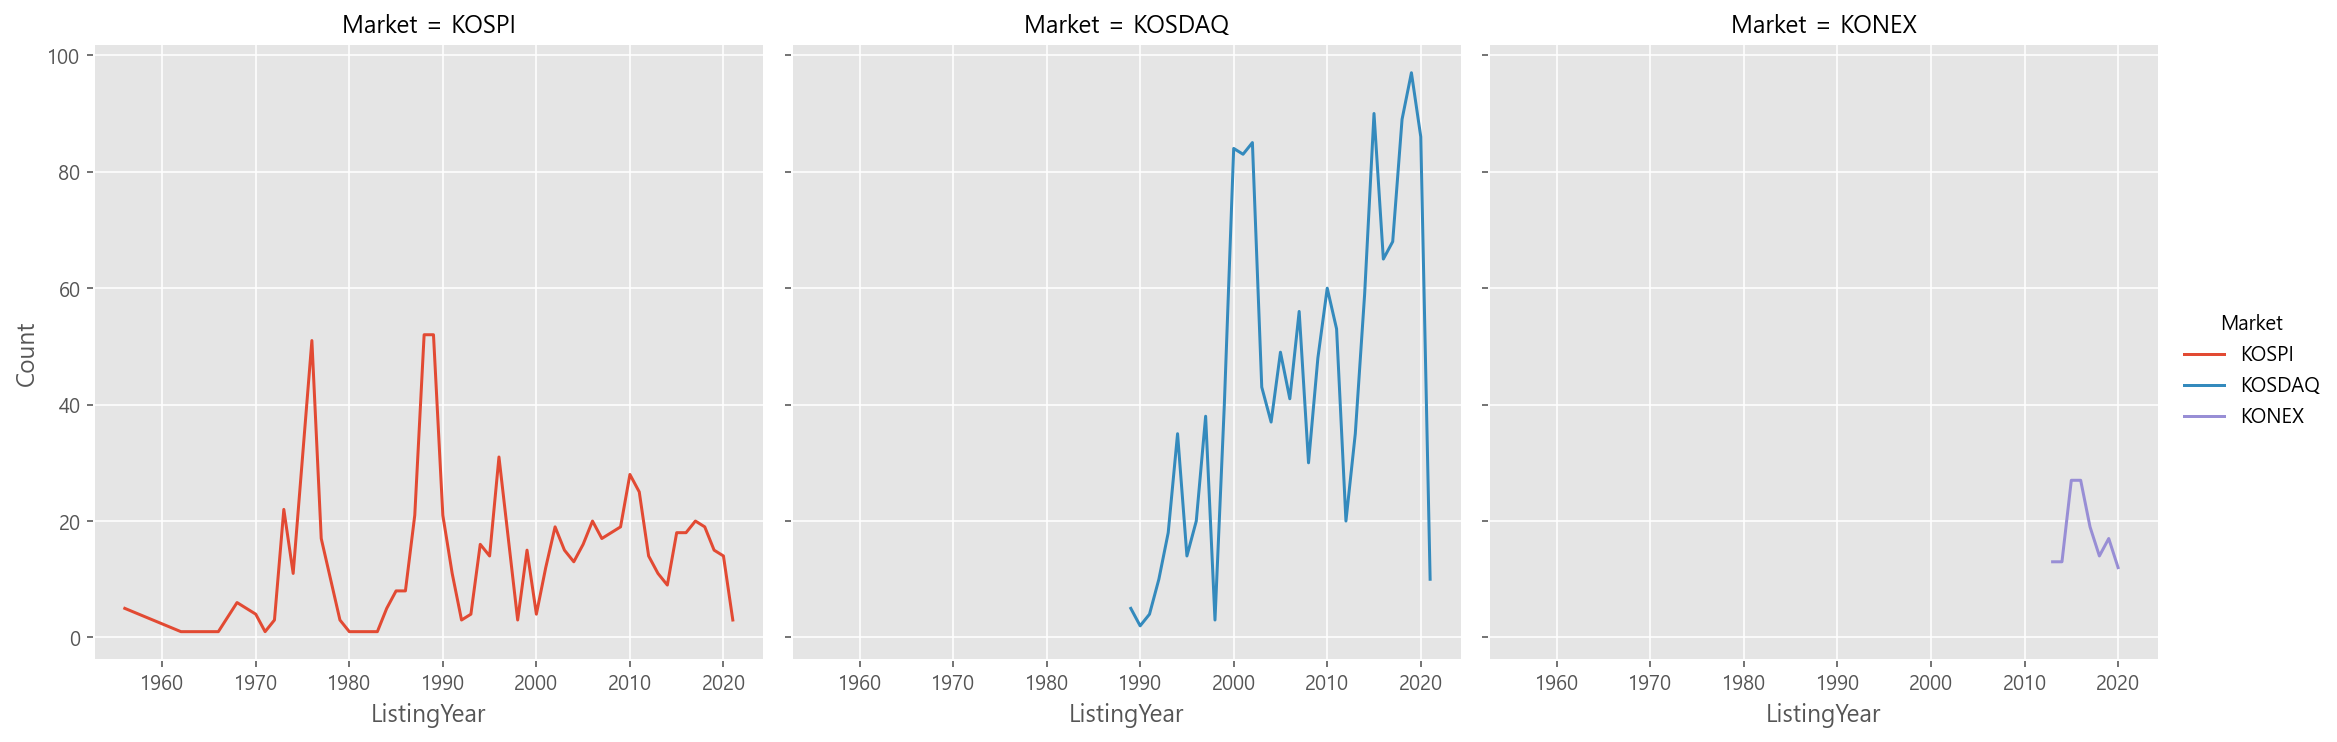

In [71]:
# row로 나열되느 replot 그리기 
sns.relplot(data=df_year_market, x="ListingYear", y="Count", row="Market")
# column으로 나열되느 replot 그리기 
sns.relplot(data=df_year_market, x="ListingYear", y="Count",
            col="Market", hue="Market")

sns.relplot(data=df_year_market, x="ListingYear", y="Count",
            col="Market", hue="Market", kind="line")

히스토그램 알아보기

<AxesSubplot:title={'center':'상장연도'}, ylabel='Frequency'>

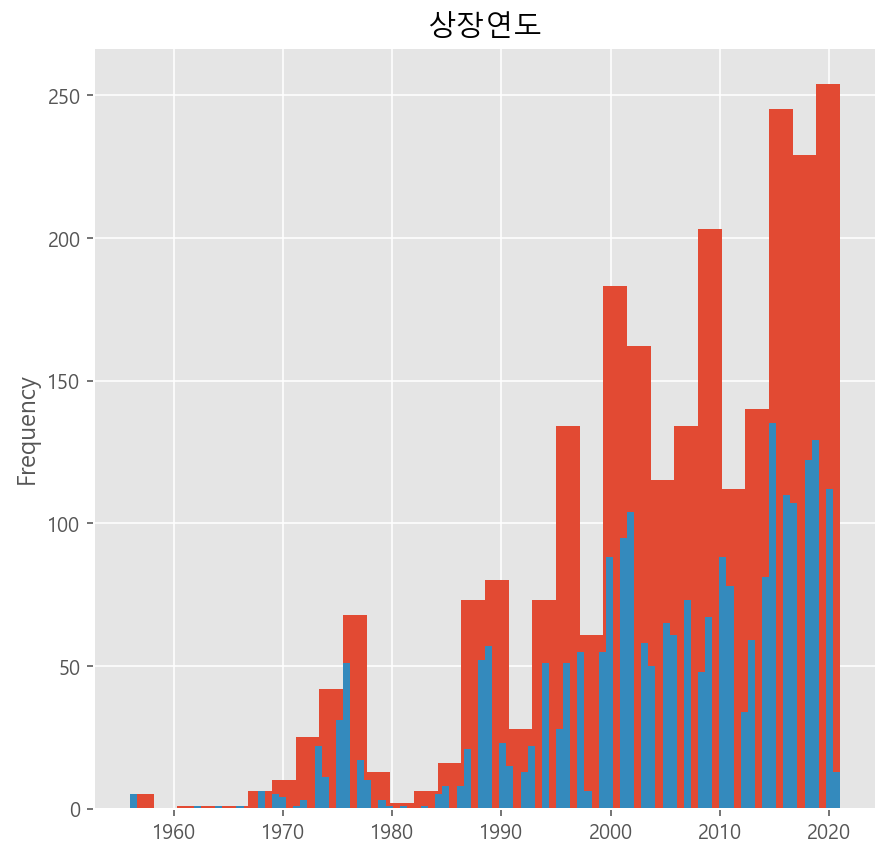

In [72]:
# 아래와 같이 bins를 별도로 주어서 구분할 수 있음 

df["ListingYear"].plot.hist(bins=30)
df["ListingYear"].plot.hist(bins=100, figsize=(7,7), title="상장연도")

이 그래프를 보고

 * 데이터가 오른쪽으로 편중되어 있으며, 2000년대에 더 많은 기업이 상장되었다.

라는 것을 알 수 있다. 

### 데이터 색인

In [73]:
# 케이맨 제도에 있는 회사 찾기
df[df["Region"] == "케이맨 제도"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
2313,900280,KOSDAQ,골든센츄리,기타 금융업,트랙터용 휠 및 타이어,2016-10-19,12월,주승화,http://www.jsj-wheel.co.kr,케이맨 제도,2016.0
2348,900070,KOSDAQ,글로벌에스엠,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",2009-12-23,12월,나윤복,http://www.globalsmtech.com,케이맨 제도,2009.0
4105,900120,KOSDAQ,씨케이에이치,기타 금융업,건강보조식품,2010-03-31,06월,린진성,NaN,케이맨 제도,2010.0
4363,900140,KOSPI,엘브이엠씨홀딩스,자동차 판매업,지주회사,2010-11-30,12월,"오세영, 노성석, 김선발 (각자 대표이사)",http://www.lvmcholdings.net,케이맨 제도,2010.0
5007,900250,KOSDAQ,크리스탈신소재,기타 금융업,"합성운모 플레이크, 파우더, 테이프",2016-01-28,12월,다이중치우 (DAI ZHONG QIU),http://www.crystalnewmaterial.com,케이맨 제도,2016.0


In [74]:
# 1970년 이전에 상장한 기업 찾기
df[df["ListingYear"] < 1970]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
56,000120,KOSPI,CJ대한통운,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,박근희,http://www.cjlogistics.com,서울특별시,1956.0
75,001530,KOSPI,DI동일,상품 중개업,"면사,화섬사,면포,혼방포,스포츠웨어용 신합섬 제조,도매,수출",1964-01-04,12월,"서태원, 손재선",http://www.dong-il.com,서울특별시,1964.0
1999,004250,KOSPI,NPC,플라스틱제품 제조업,"산업용기프라스틱제품(플라스틱 파렛트,시트 파렛트) 제조,판매",1969-09-08,12월,최병민,http://www.npc.co.kr,경기도,1969.0
2296,000050,KOSPI,경방,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시,1956.0
2569,001440,KOSPI,대한전선,절연선 및 케이블 제조업,"전력선,통신케이블,적산계기,스텐레스압연제품,광케이블,초고압선,알루미늄 제조,도매/전기공사",1968-12-27,12월,나형균,http://www.taihan.com,경기도,1968.0
2571,001790,KOSPI,대한제당,"곡물가공품, 전분 및 전분제품 제조업","제당,가축용 배합사료,설탕,기능성감미료(자일로올리고당),외식산 제조,도소매/부동산 임대",1968-12-27,12월,김기영,http://www.ts.co.kr,인천광역시,1968.0
2574,003490,KOSPI,대한항공,항공 여객 운송업,"여객운송,화물운송,항공기 제조,판매,정비수리/기내식 제조판매,면세품 판매",1966-03-18,12월,"조원태, 우기홍",http://www.koreanair.com,서울특별시,1966.0
2829,000060,KOSPI,메리츠화재,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시,1956.0
3756,000070,KOSPI,삼양홀딩스,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,윤재엽,http://www.samyang.com,서울특별시,1968.0
3856,002420,KOSPI,세기상사,"영화, 비디오물, 방송프로그램 제작 및 배급업","극장(영화상영)/극영화,만화영화 제조/음식료품,일용잡화 소매/부동산 임대",1968-12-27,12월,김정희,http://daehancinema.com,서울특별시,1968.0


In [75]:
# 2021년 상장한 서울특별시에 소재한 코스피 종목을 찾기

df[(df["ListingYear"] == 2021) & 
   (df["Region"] == "서울특별시") & 
   (df["Market"] == "KOSPI")]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
78,375500,KOSPI,DL이앤씨,토목 건설업,토목 건설 사업,2021-01-25,12월,마창민,NaN,서울특별시,2021.0


In [76]:
# Sector, Region 으로 crosstab 연산하기
df_sr = pd.crosstab(df["Sector"], df["Region"])
df_sr

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,...,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,11,7,1,0,1,0,12,11,...,0,4,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해상 운송업,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,1,0,1,0,1,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0


In [77]:
# 특정 컬럼만 가져오기
df_sr[["서울특별시", "경기도", "인천광역시"]]

Region,서울특별시,경기도,인천광역시
Sector,,,
1차 비철금속 제조업,3,7,0
1차 철강 제조업,11,4,4
가구 제조업,3,4,1
가전제품 및 정보통신장비 소매업,1,0,0
가정용 기기 제조업,1,6,0
...,...,...,...
해상 운송업,5,0,0
"해체, 선별 및 원료 재생업",0,1,0
화학섬유 제조업,6,1,0


In [78]:
# df_sr에서 "소프트웨어 개발 및 공급업" 행만 가져오기
df_sr.loc["소프트웨어 개발 및 공급업"].sort_values(ascending=False)

Region
서울특별시      93
경기도        38
충청북도        2
일본          2
홍콩          1
광주광역시       1
대전광역시       1
부산광역시       1
경상남도        0
경상북도        0
대구광역시       0
미국          0
세종특별자치시     0
케이맨 제도      0
싱가포르        0
울산광역시       0
인천광역시       0
전라남도        0
전라북도        0
제주특별자치도     0
충청남도        0
강원도         0
Name: 소프트웨어 개발 및 공급업, dtype: int64

In [79]:
# loc 로 행인덱스 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업" 가져오기
df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"]]

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
소프트웨어 개발 및 공급업,0,38,0,0,1,0,1,0,1,93,...,0,0,2,0,0,0,0,2,0,1
금융 지원 서비스업,0,0,0,1,0,0,0,0,0,71,...,0,0,0,0,0,0,0,0,0,0
의약품 제조업,5,34,1,0,0,0,2,0,1,39,...,0,2,0,0,0,0,2,5,0,0


In [80]:
# loc로 여러 행과 열 가져오기

df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"], 
          ["서울특별시", "경기도", "인천광역시"]]

Region,서울특별시,경기도,인천광역시
Sector,,,
소프트웨어 개발 및 공급업,93,38,0
금융 지원 서비스업,71,0,0
의약품 제조업,39,34,2



출처 : https://matplotlib.org/3.2.1/gallery/showcase/anatomy.html


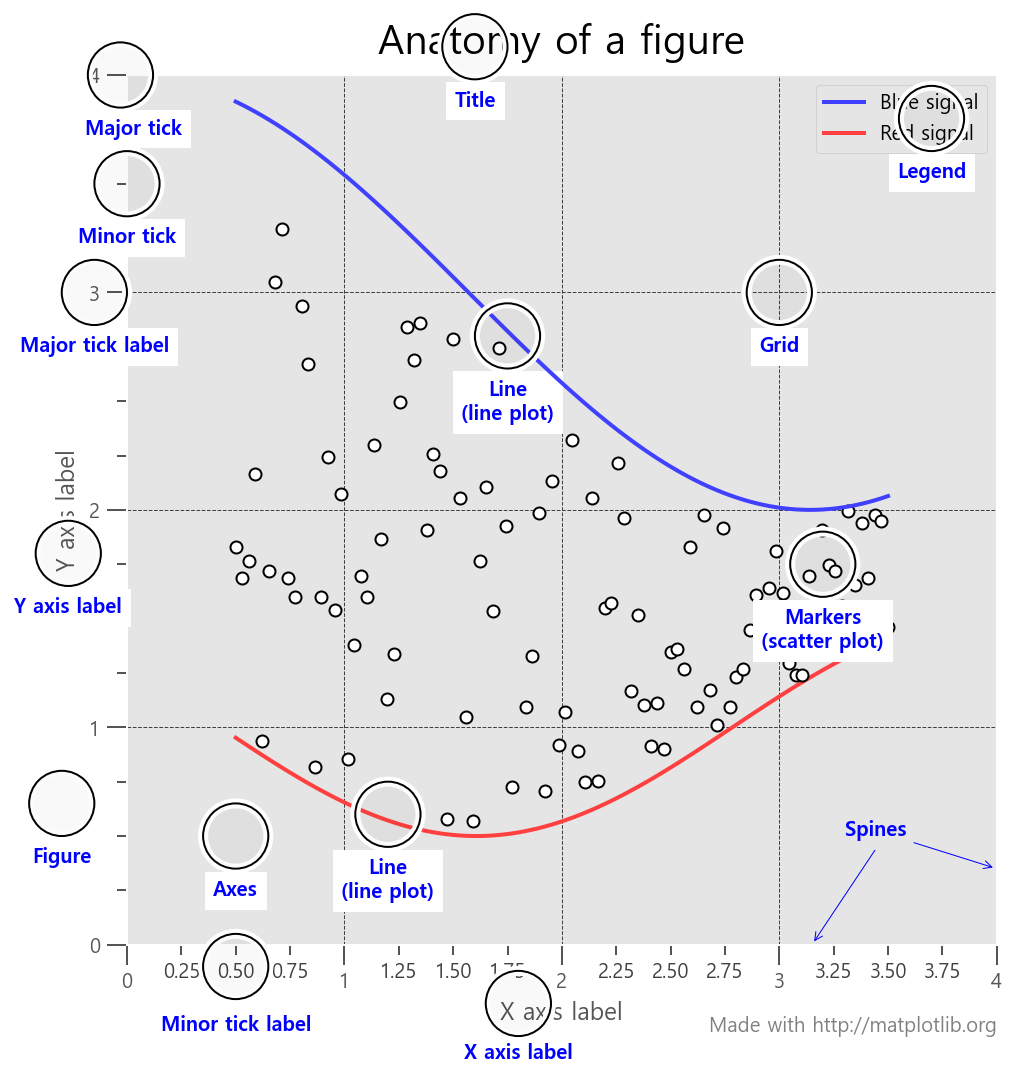

In [83]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()


출처 : https://matplotlib.org/3.2.1/gallery/showcase/anatomy.html